## Table of content

1. Introduction
2. Goal
3. Import Datset & libraries
4. Data Preparation 
5. Overview
6. EDA
7. Data Pre-processing
8. Statistical Techniques
9. Descriptive Statistical Analyses
10. Hypothesis Formulation and Testing
11. Jupyter Notebook Analysis
12. Machine Leaning 
13. Splitting
14. Training and Testing
15. Conclusions
16. References
17. GitHub repo link

Import Datset & libraries

In [2850]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2851]:
df = pd.read_csv('Employee_Attrition.csv')
df.shape

(1470, 35)

In [2852]:
print("Our Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
display(df.describe())
display(df.head())
display(df.dtypes.value_counts())

Our Dataset has 1470 rows and 35 columns


Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1323.000000  1323.000000       1323.000000  1323.000000    1323.000000   
mean     36.635268   802.030050          9.091097     2.923447       0.999325   
std       9.882161   414.031025          8.177870     1.072203       0.099656   
min      14.544608    86.828045          0.750112     0.770362       0.628985   
25%      29.624982   456.479553          2.147069     2.122706       0.931146   
50%      34.951950   782.958705          6.920808     3.015658       0.998949   
75%      42.748741  1130.577949         13.584900     3.700560       1.067371   
max      69.402515  1784.394456         33.684424     6.285161       1.290613   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1323.000000              1323.000000  1323.000000     1323.000000   
mean      1026.679166                 2.726443    65.647722        2.743028   
std        610.480802                 1.129679    21.469709        0.765568   
min          1.054148                 0.759655    23.855272        0.722008   
25%        501.854842                 1.894818    47.701897        2.177638   
50%       1022.025017                 2.887313    64.934490        2.859143   
75%       1533.811096                 3.676600    83.038355        3.179128   
max       2530.919375                 5.254672   123.200439        5.241968   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1323.000000  ...               1323.000000    1323.000000   
mean      2.058270  ...                  2.720431      80.241313   
std       1.127018  ...                  1.115959       8.022535   
min       0.715172  ...                  0.720696      53.793059   
25%       1.045228  ...                  1.909010      74.882946   
50%       1.936150  ...                  2.891235      80.351400   
75%       2.609707  ...                  3.639961      85.664169   
max       5.942269  ...                  5.092280     107.378705   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1323.000000        1323.000000            1323.000000   
mean           0.814757          11.426152               2.811756   
std            0.863076           8.075870               1.329044   
min            0.000000           0.000000               0.000000   
25%            0.000000           5.953221               1.967328   
50%            0.913651           9.306742               2.690934   
75%            1.082523          15.324548               3.366949   
max            3.474319          47.641892               7.503201   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1323.000000     1323.000000         1323.000000   
mean          2.762825        6.933624            4.233363   
std           0.761802        6.046798            3.658111   
min           0.799138        0.000000            0.000000   
25%           2.193390        2.673269            1.824392   
50%           2.899807        5.422160            2.968874   
75%           3.206117        9.238005            7.052591   
max           4.856086       36.848408           19.091844   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1323.000000           1323.000000  
mean                  2.160710              4.117695  
std                   3.221481              3.594053  
min                   0.000000              0.000000  
25%                   0.000000              1.687177  
50%                   0.967140              2.939240  
75%                   2.586631              6.987964  
max                  17.273662             19.976003  

[8 rows x 26 columns]

Age Attrition     BusinessTravel    DailyRate  \
0  41.920786       Yes      Travel_Rarely   990.110009   
1  51.589037        No  Travel_Frequently   276.776030   
2  33.131540       Yes      Travel_Rarely  1204.158501   
3  34.707073        No  Travel_Frequently  1352.752432   
4  24.790188        No      Travel_Rarely   485.053333   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales          1.016716   1.770313  Life Sciences   
1  Research & Development               NaN   1.035333  Life Sciences   
2  Research & Development          2.198662   2.118801          Other   
3                   Sales          2.937851   3.670674  Life Sciences   
4  Research & Development          1.988953   1.120496        Medical   

   EmployeeCount  EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0       1.033298        1.054148  ...                  1.012832     95.612654   
1       0.944859        2.107031  ...                  4.312008     85.370868   
2       0.810809        4.008125  ...                  2.332558     76.248084   
3       0.822976        4.587269  ...                  3.029591     75.888697   
4            NaN        7.228740  ...                       NaN     72.670937   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0          0.000000           8.063833               0.000000        1.052104   
1          1.104642           8.965059               3.264952        2.526470   
2          0.000000           8.427238               3.004521        2.924784   
3          0.000000           7.662606               2.856001        3.117053   
4          0.953012           6.241733               2.814719        3.112317   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0        5.795945           3.993896                 0.000000   
1       10.070232           7.937505                 1.032295   
2        0.000000           0.000000                 0.000000   
3        8.435324           5.563667                 2.845429   
4        2.040124           1.970786                 2.495949   

   YearsWithCurrManager  
0              4.594972  
1              5.901207  
2              0.000000  
3              0.000000  
4              2.219353  

[5 rows x 35 columns]

float64    26
object      9
Name: count, dtype: int64

Overview

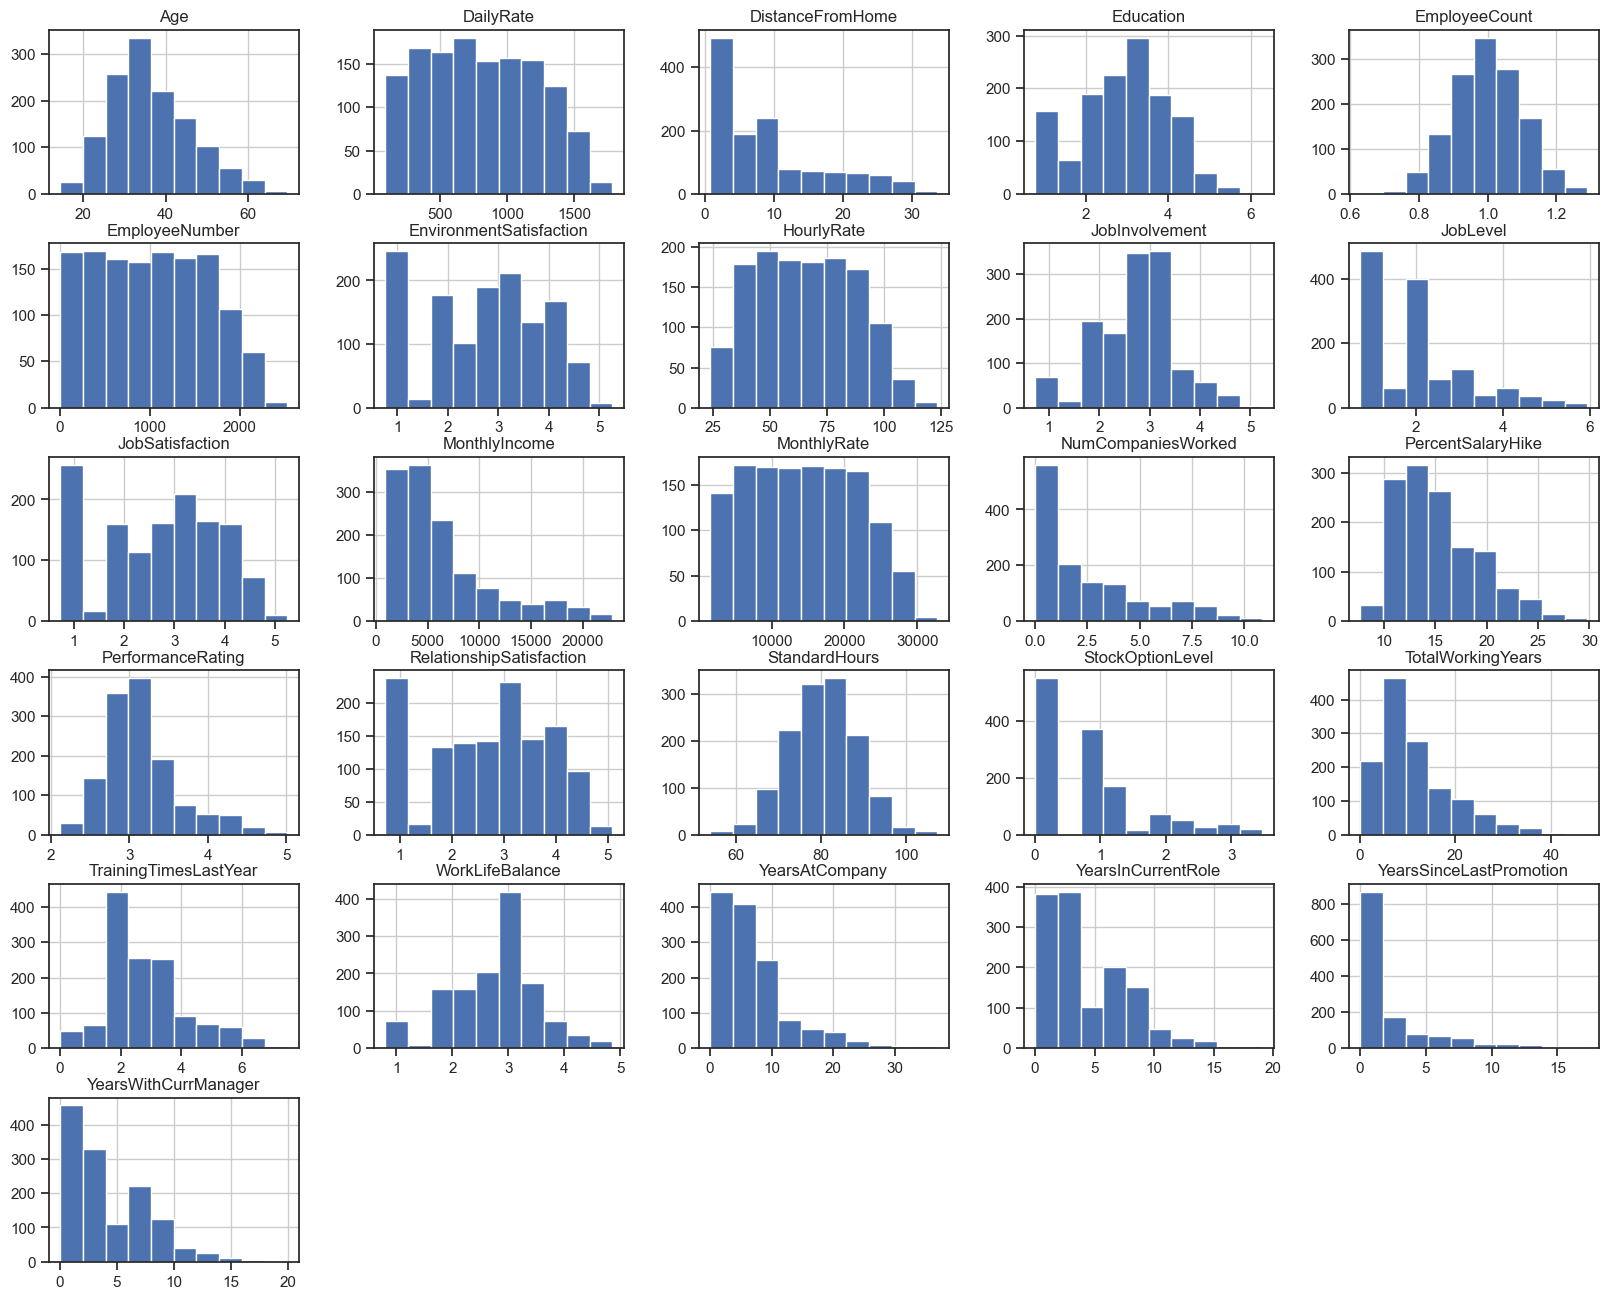

In [2853]:
df.hist(figsize=(20, 16))
plt.show()

Some features look kind of normal distributed. Let's check with the in-built Pandas function for data visualization if they really are

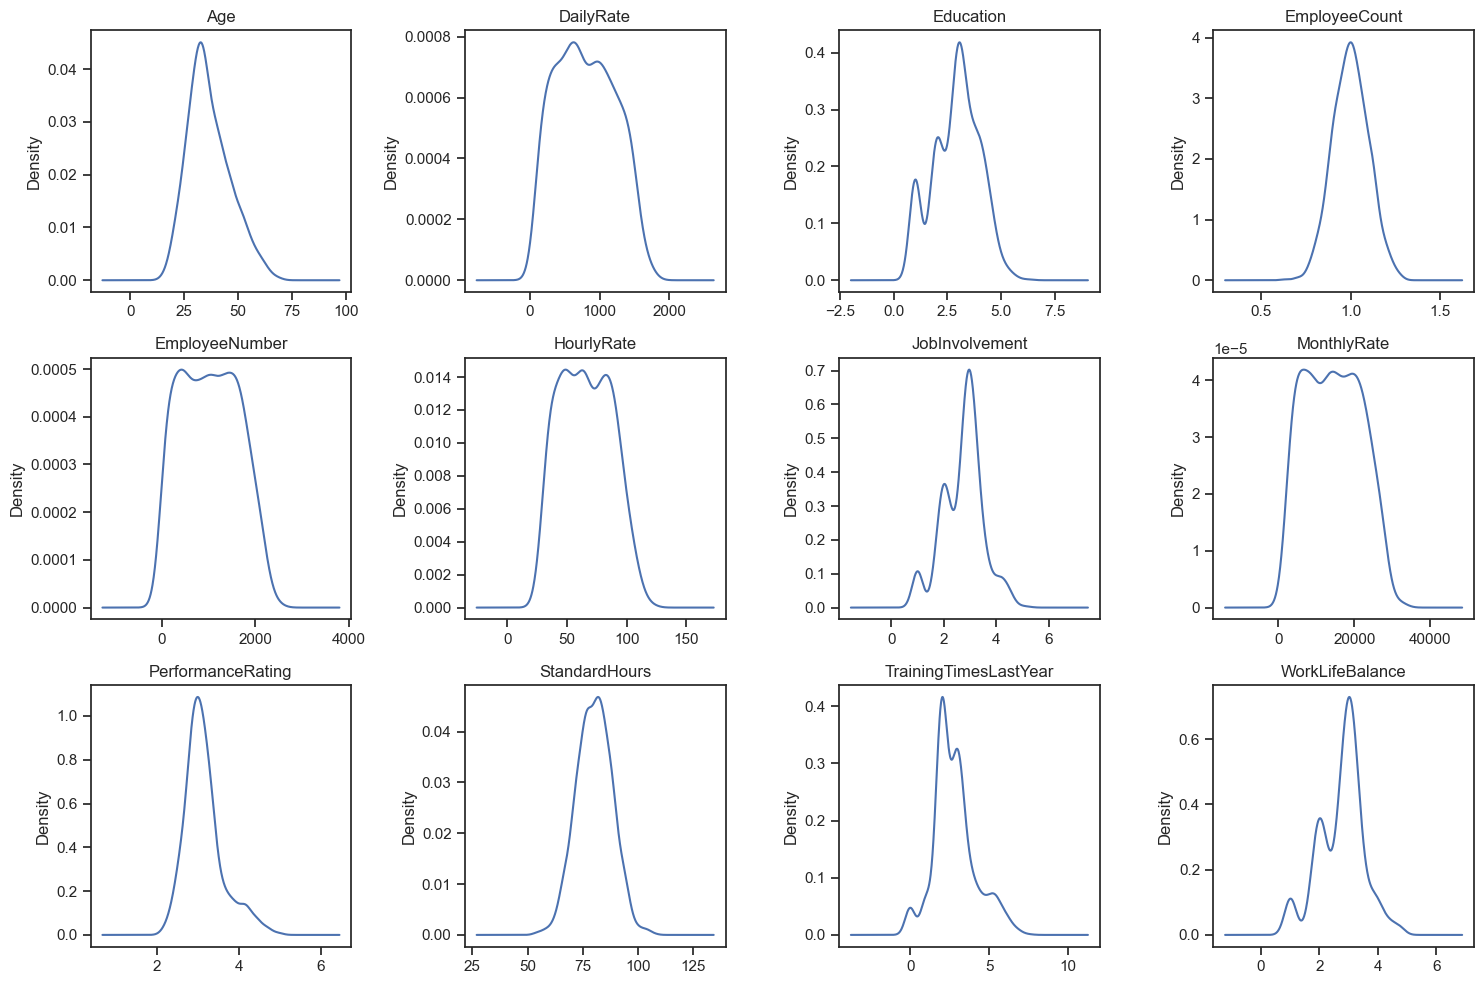

In [2854]:
normal_distributed_features = ["Age", "DailyRate", "Education", "EmployeeCount", "EmployeeNumber", "HourlyRate", "JobInvolvement", "MonthlyRate","PerformanceRating", "StandardHours","TrainingTimesLastYear","WorkLifeBalance"]
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(normal_distributed_features):
    df[column].plot(kind='kde', ax=axes[i], title=column)

plt.tight_layout()
plt.show()

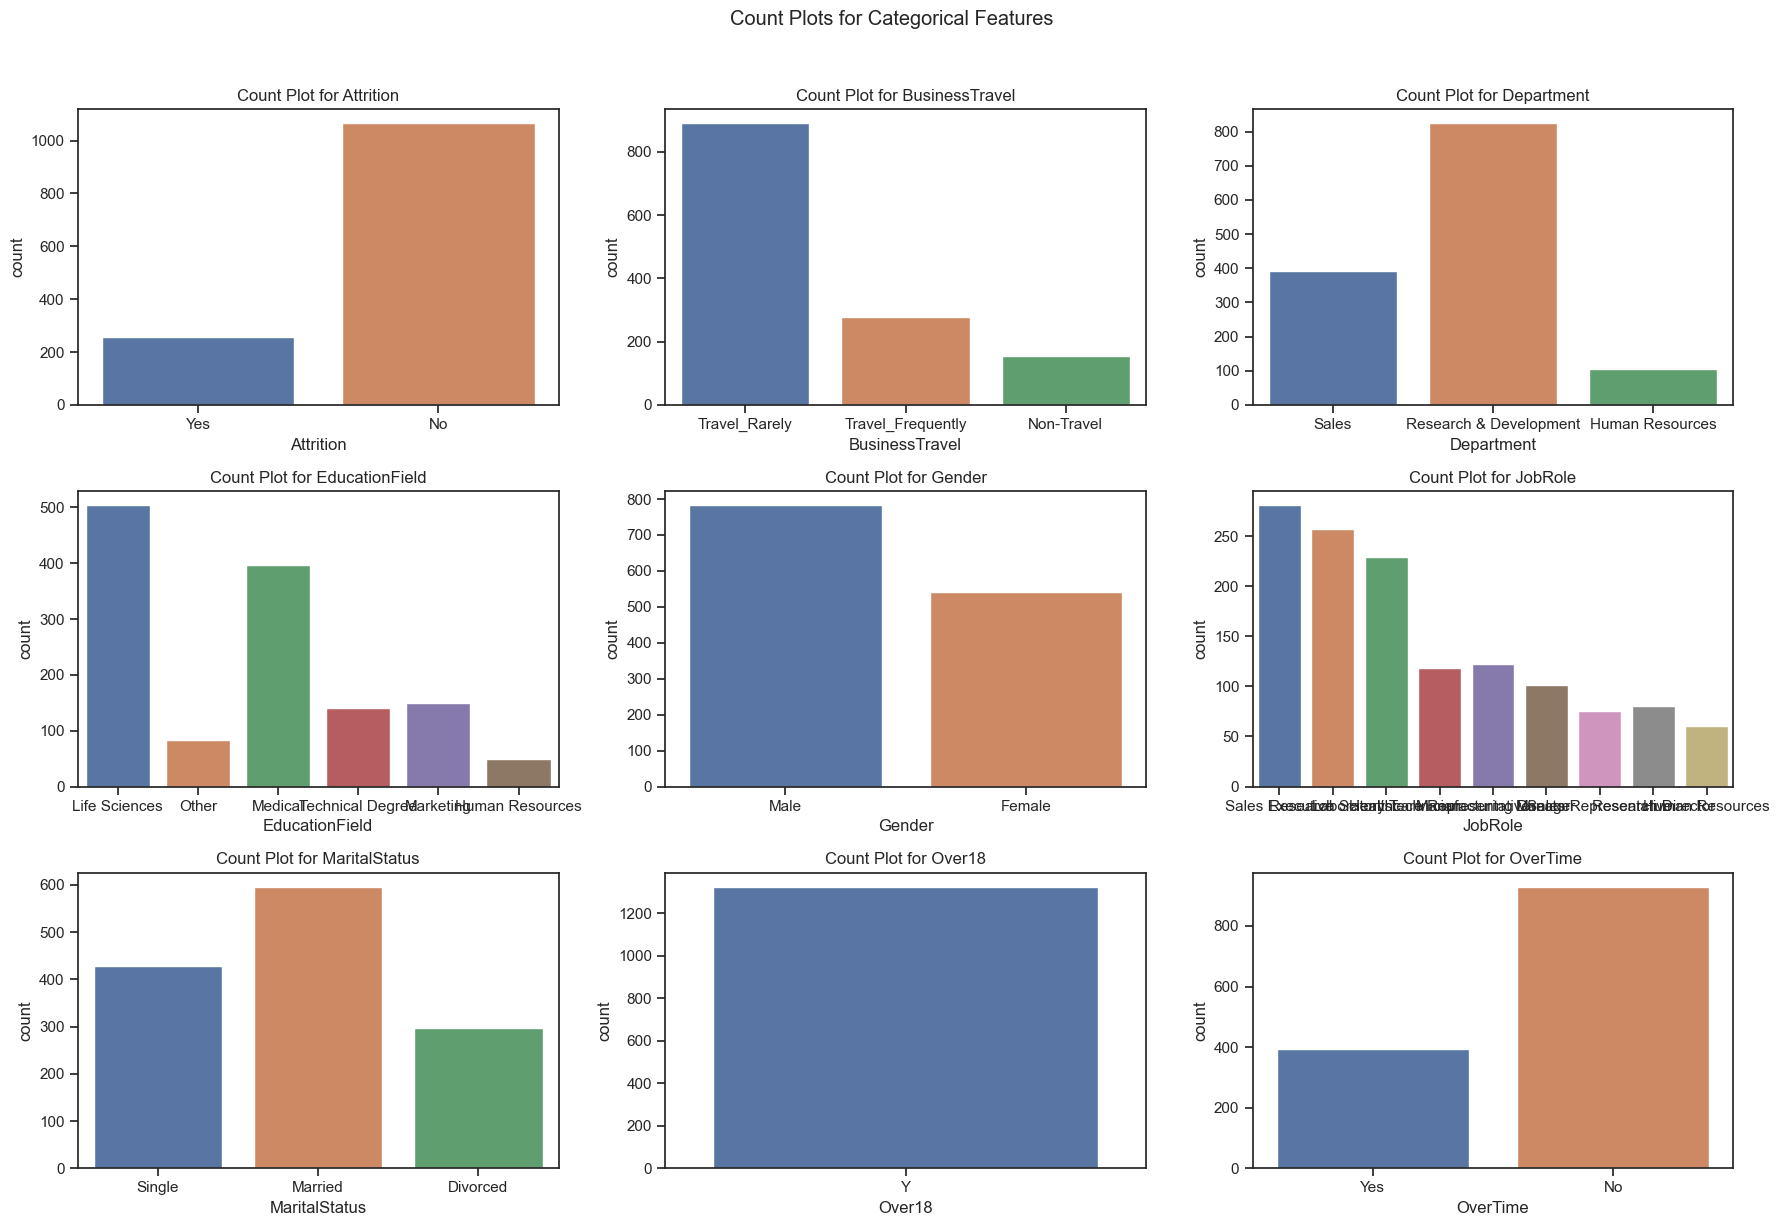

In [2855]:
plt.figure(figsize=(18, 12))
for i, feature in enumerate(df.select_dtypes(include=['object']).columns, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(x=feature, data=df)
    plt.title(f'Count Plot for {feature}')

plt.suptitle('Count Plots for Categorical Features', y=1.02)
plt.tight_layout()
plt.show()

Let's have a look at the percentage of the feature with more variables which is JobRole

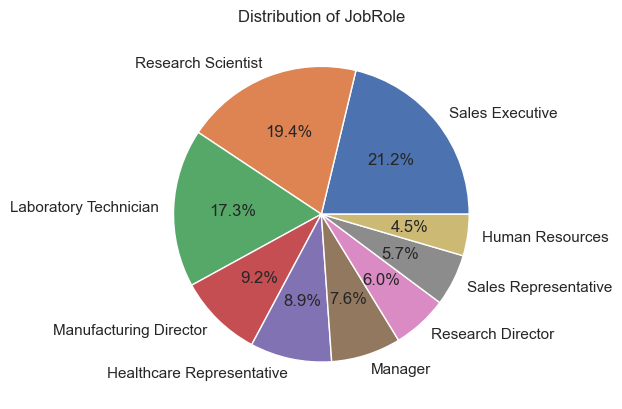

In [2856]:
df['JobRole'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of JobRole')
plt.ylabel('')
plt.show()

We now want to examine the percentage of employees who achieve a certain milestone and the time it takes for them to do so

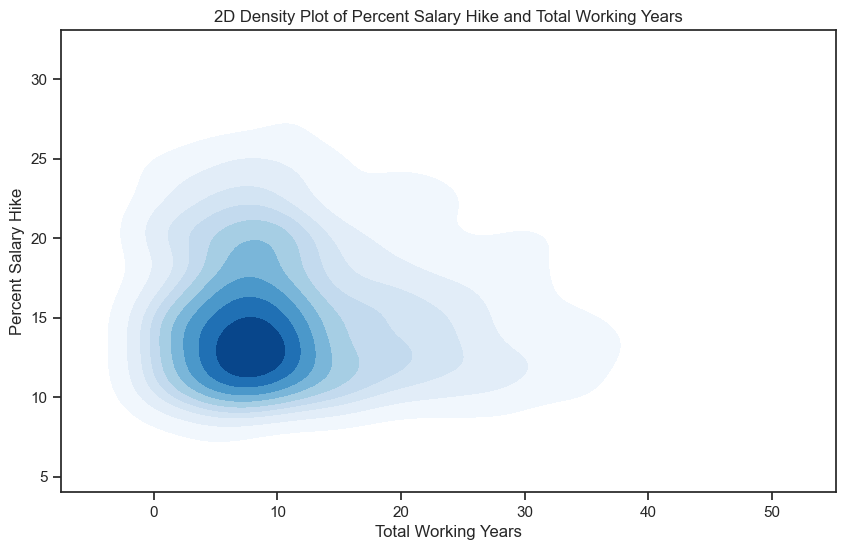

In [2857]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='TotalWorkingYears', y='PercentSalaryHike', data=df, cmap='Blues', fill=True)
plt.title('2D Density Plot of Percent Salary Hike and Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Percent Salary Hike')
plt.show()

Missing values in the Dataset

In [2858]:
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

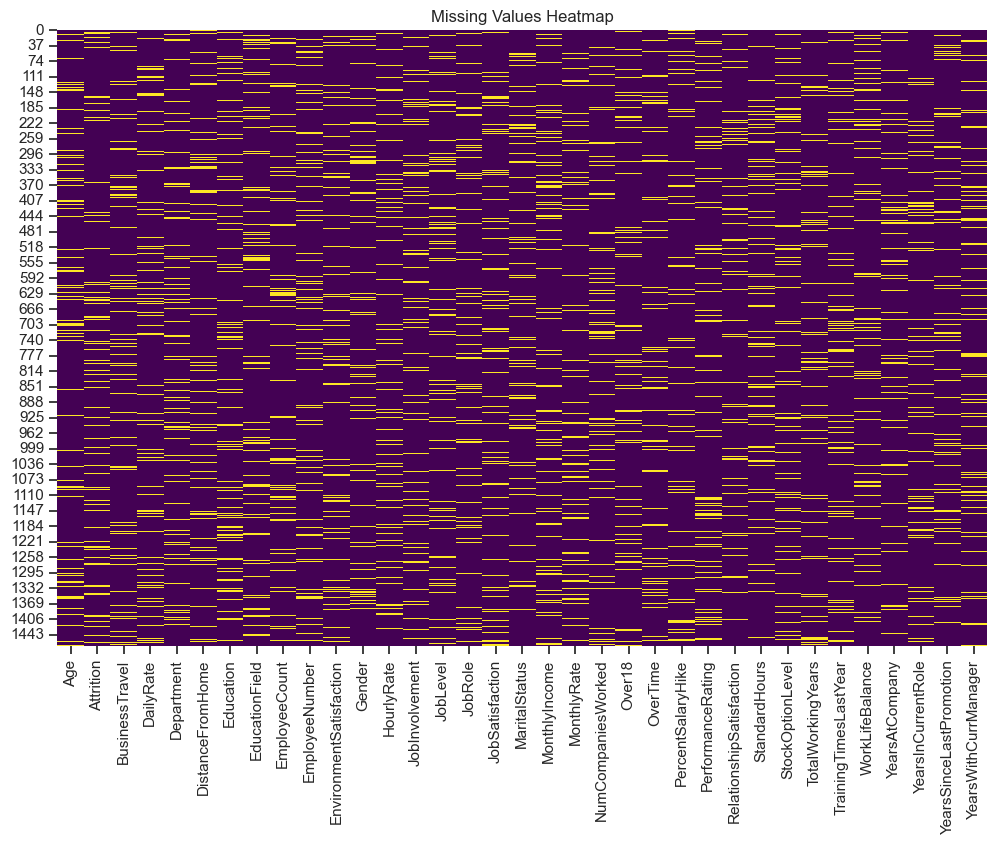

In [2859]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Check for duplicated values

In [2860]:
df.duplicated().sum() 

0

Our target variable

In [2861]:
df["Attrition"].unique()

array(['Yes', 'No', nan], dtype=object)

In [2862]:
df["Attrition"].value_counts(dropna=False)

Attrition
No     1065
Yes     258
NaN     147
Name: count, dtype: int64

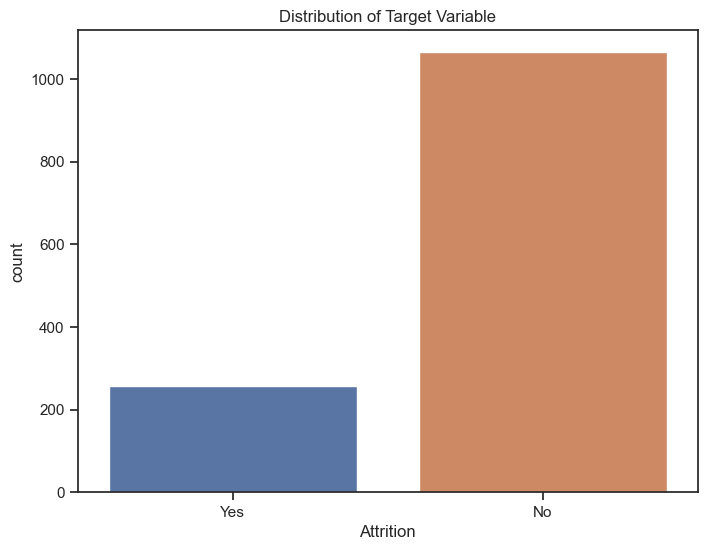

In [2863]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Target Variable')
plt.show()

Our target variable looks very unbalanced. In the Machine Learning steps, we will run our chosen models with and without balance it

In [2864]:
# from ydata_profiling import ProfileReport
# slice_df = df.iloc[:, :10]
# report = ProfileReport(df, title='My Data', minimal=True)
# report.to_file("First Attrition File.html")

EDA

Since Over18 has a constant value "YES", and missing values, let's create a bar plot which show us if the missing values have to be replaced or dropped

In [2865]:
df['Over18'].fillna('UNKNOWN', inplace=True)

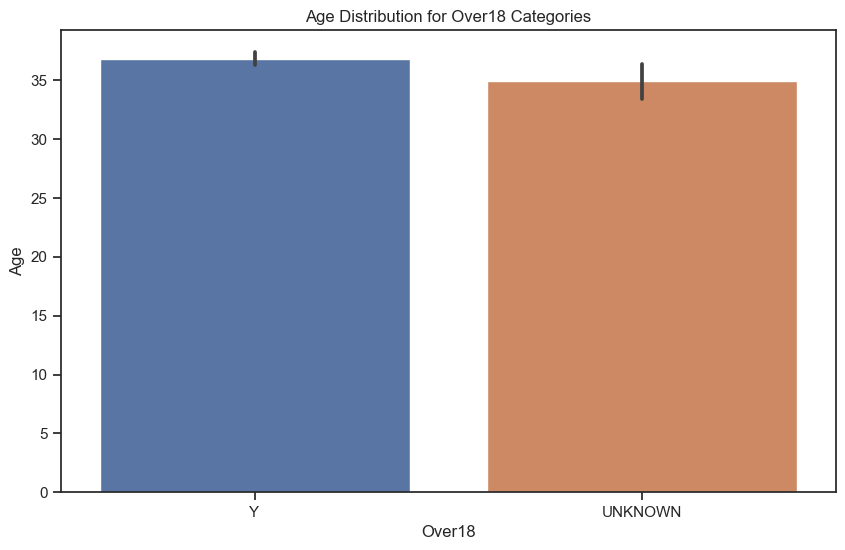

In [2866]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Over18', y='Age', data=df)
plt.title('Age Distribution for Over18 Categories')
plt.xlabel('Over18')
plt.ylabel('Age')
plt.show()


If the corrisponding age is over or equal to 18 years old in "Over18" feature, we're going to replace the missing value with "Y"

In [2867]:
df['Over18'].fillna('UNKNOWN', inplace=True)
df.loc[(df['Over18'] == 'UNKNOWN') & (df['Age'] >= 18), 'Over18'] = 'Y'
print(df['Over18'].value_counts())

Over18
Y          1456
UNKNOWN      14
Name: count, dtype: int64


In [2868]:
unknown_age_records = df[df['Over18'] == 'UNKNOWN']
print(unknown_age_records[['Age', 'Over18']])

            Age   Over18
206   16.057972  UNKNOWN
609         NaN  UNKNOWN
705         NaN  UNKNOWN
717         NaN  UNKNOWN
746         NaN  UNKNOWN
870         NaN  UNKNOWN
1073        NaN  UNKNOWN
1089        NaN  UNKNOWN
1243        NaN  UNKNOWN
1248        NaN  UNKNOWN
1314        NaN  UNKNOWN
1382        NaN  UNKNOWN
1459        NaN  UNKNOWN
1468        NaN  UNKNOWN


Most of missing 'Over18' values don't have the age information and they are also relatively small and these rows don't carry critical information for our analysis so we choose to drop them

In [2869]:
df = df[df['Over18'] != 'UNKNOWN']
print(df['Over18'].value_counts())

Over18
Y    1456
Name: count, dtype: int64


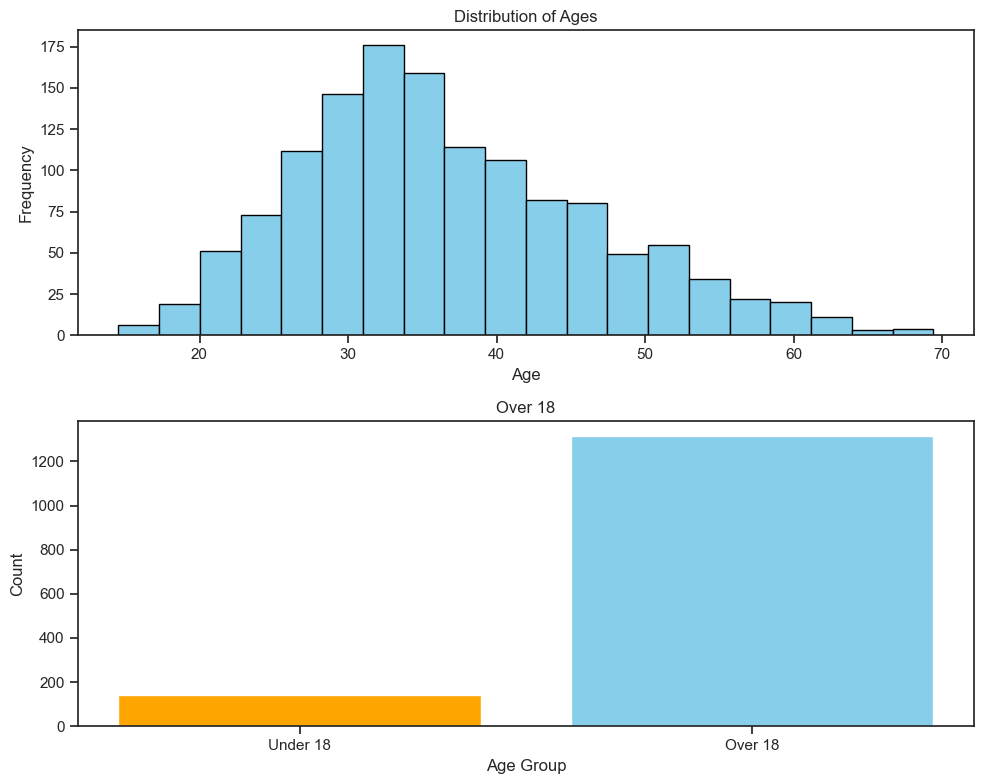

Over18
True     1316
False     140
Name: count, dtype: int64


In [2870]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Ages')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

df['Over18'] = df['Age'] > 18
axes[1].bar(df['Over18'].value_counts().index, df['Over18'].value_counts(), color=['skyblue', 'orange'])
axes[1].set_title('Over 18')
axes[1].set_xticks([False, True])
axes[1].set_xticklabels(['Under 18', 'Over 18'])
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()
print(df['Over18'].value_counts())

Use the mean for the normal distributed features

In [2871]:
for feature in normal_distributed_features:
    df[feature].fillna(df[feature].mean(), inplace=True)

Use the median for all the floating variables which have a skewed distribution or are concerned about the influence of outliers as we could see in the Overview

In [2872]:
float_columns = df.select_dtypes(include='float64').columns
float_columns_to_impute = [col for col in float_columns if col not in normal_distributed_features]

for col in float_columns_to_impute:
    df[col].fillna(df[col].median(), inplace=True)

Looking at Age, we need to round it into integer values

In [2873]:
df['Age'] = df['Age'].round().astype(int)
print(df['Age'].unique())

[42 52 33 35 25 30 62 27 37 28 21 60 34 24 31 32 44 48 41 40 29 46 22 39
 54 47 63 56 59 53 45 51 55 36 20 26 38 43 18 61 19 50 57 49 23 58 67 17
 65 69 68 15]


In [2874]:
df.isnull().sum()

Age                           0
Attrition                   146
BusinessTravel              147
DailyRate                     0
Department                  147
DistanceFromHome              0
Education                     0
EducationField              145
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                      147
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                     143
JobSatisfaction               0
MaritalStatus               146
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                    147
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [2875]:
print("Integer columns:")
print(df.select_dtypes(include='int64' and 'int32').columns)
print("\nFloat columns:")
print(df.select_dtypes(include='float64').columns)
print("\nObject columns:")
print(df.select_dtypes(include='object').columns)

Integer columns:
Index(['Age'], dtype='object')

Float columns:
Index(['DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Object columns:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


In order to decide how can we Handle missing values in our target variable, is important to see the realtionship between  "Attrition" variable's missing values and other features. We also replace all the categorical features with the mode

In [2876]:
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    if col != 'Attrition':
        df[col].fillna(df[col].mode()[0], inplace=True)

missing_values_after_drop = df.isnull().sum()
print(missing_values_after_drop)

Age                           0
Attrition                   146
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

Let's create a Flag for Missing Values in Attrition

In [2877]:
df['Attrition_Missing'] = df['Attrition'].isnull().astype(int)

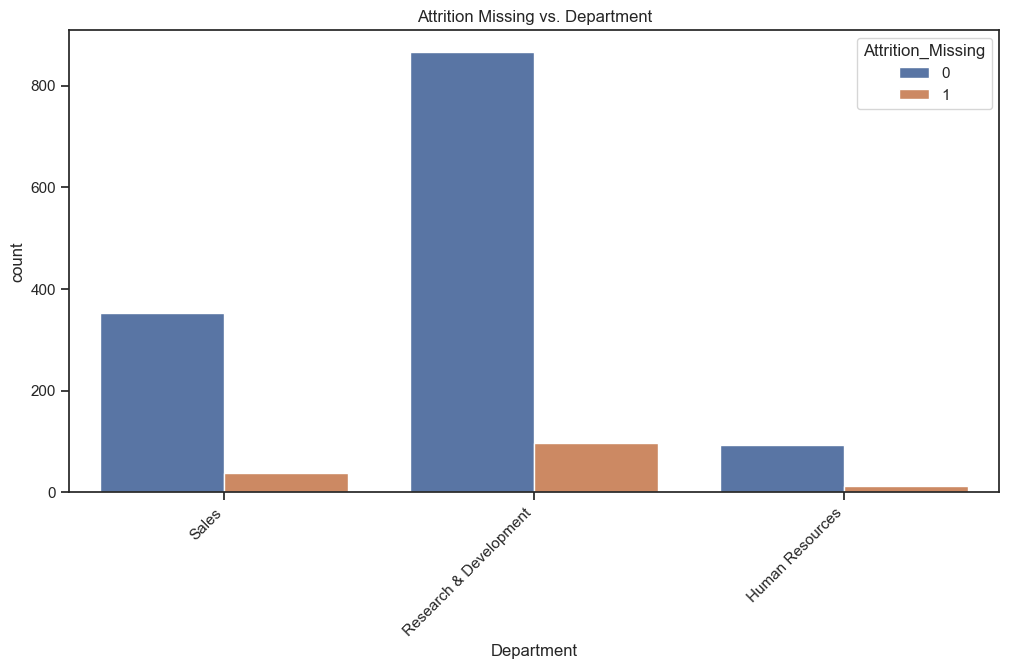

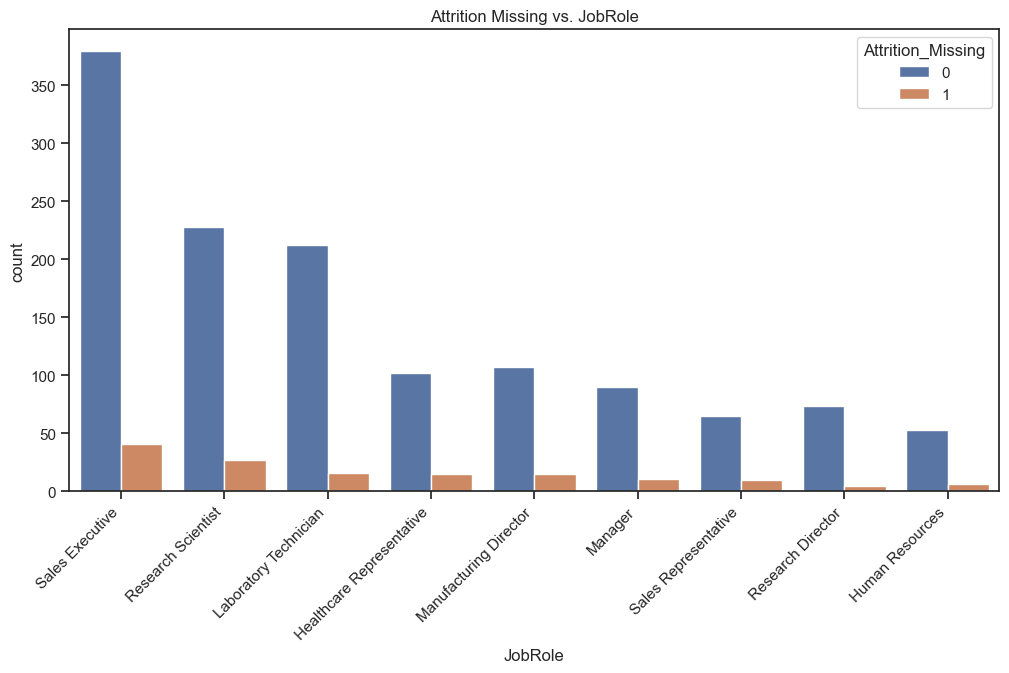

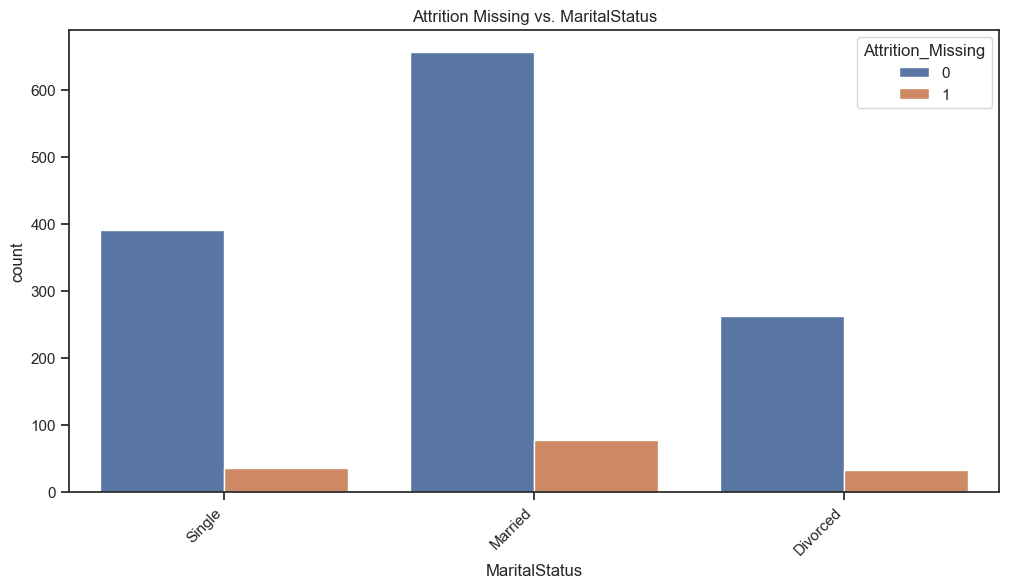

In [2878]:
c_1 = ['Department', 'JobRole', 'MaritalStatus']

for feature in c_1:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='Attrition_Missing', data=df)
    plt.title(f'Attrition Missing vs. {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

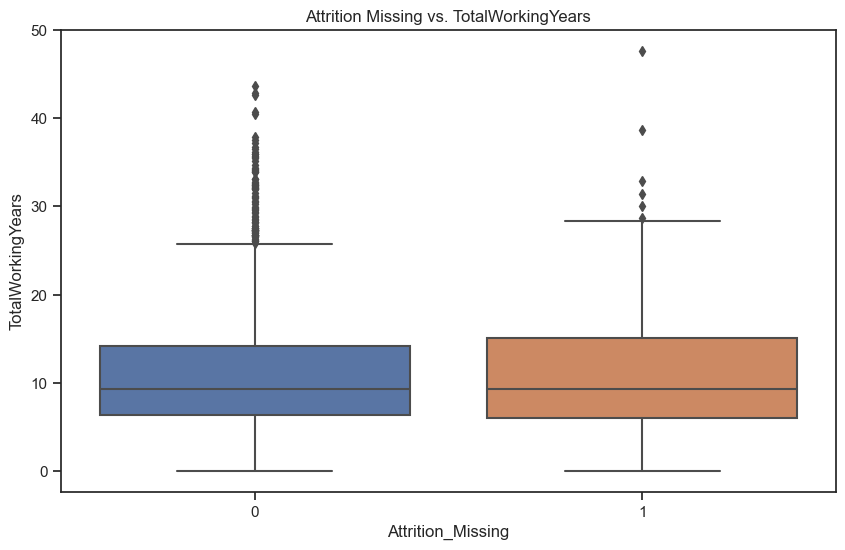

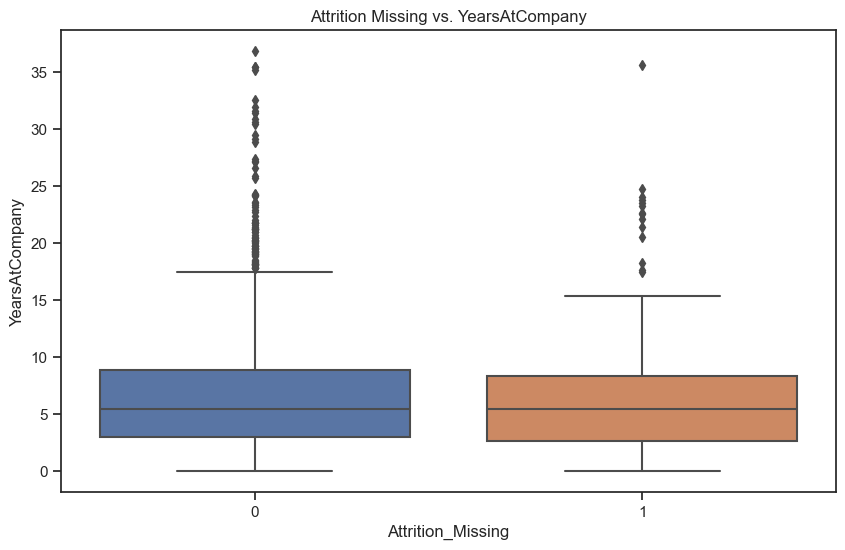

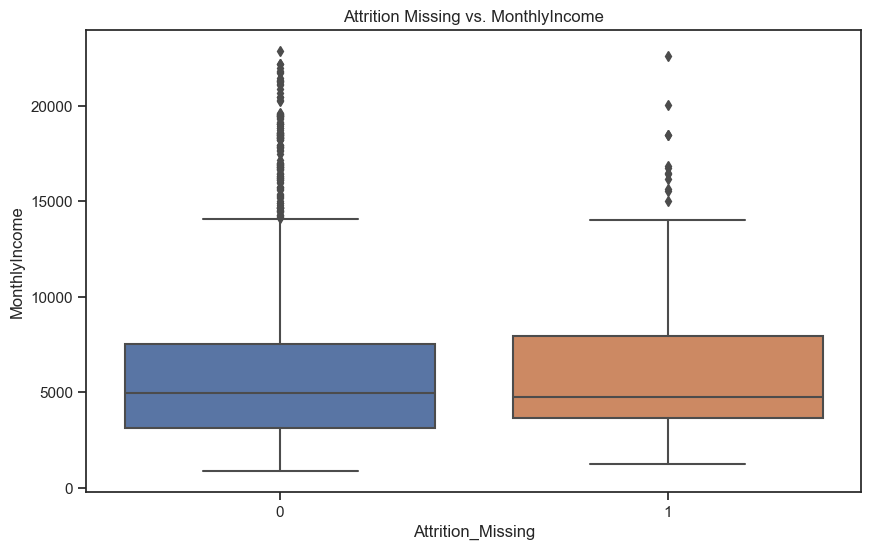

In [2879]:
c_2 = ['TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncome']

for feature in c_2:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attrition_Missing', y=feature, data=df)
    plt.title(f'Attrition Missing vs. {feature}')
    plt.show()

By comparing Attrition with the other variables, the trend of the values of our target variable remains unchanged. Therefore, we can consider the choice of dropping the missing values of that

In [2880]:
df.dropna(subset=["Attrition"], inplace=True)
df.drop('Attrition_Missing', axis=1, inplace=True)

In [2881]:
missing_values_after_last_drop = df.isnull().sum()
print(missing_values_after_last_drop)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Let's have a look to all the features which have more than 10% of 0 values

In [2882]:
zero_percentage = (df == 0).mean()
features_with_high_zero_percentage = zero_percentage[zero_percentage > 0.1].index

print("Features with more than 10% zero values:")
print(features_with_high_zero_percentage)

Features with more than 10% zero values:
Index(['NumCompaniesWorked', 'StockOptionLevel', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


We decide to leave it as it is because these 0 values have an imporant meaning for our goal

After checking the second attrition File, we noticed that in this situation, some features won't offer any discriminatory power, and their inclusion in analysis or modeling might not be necessary

In [2883]:
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'StockOptionLevel'], inplace=True)
print("Columns after dropping:", df.columns)

Columns after dropping: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


We also decided to round the specified columns to integers and to round the specified columns to 2 decimals in our Dataset

In [2884]:
df[['NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']] = df[['NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].round().astype(int)
columns_to_round_2_decimals = ['DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                               'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                               'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'PerformanceRating',
                               'RelationshipSatisfaction', 'WorkLifeBalance']
df[columns_to_round_2_decimals] = df[columns_to_round_2_decimals].round(2)

print(df[['NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].head())
print(df[columns_to_round_2_decimals].head())

   NumCompaniesWorked  TotalWorkingYears  TrainingTimesLastYear  \
0                   7                  8                      0   
1                   1                  9                      3   
2                   6                  8                      3   
3                   1                  8                      3   
4                  10                  6                      3   

   YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                   4                        0   
1              10                   8                        1   
2               0                   0                        0   
3               8                   6                        3   
4               2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     6  
2                     0  
3                     0  
4                     2  
   DailyRate  DistanceFromHome  Education  E

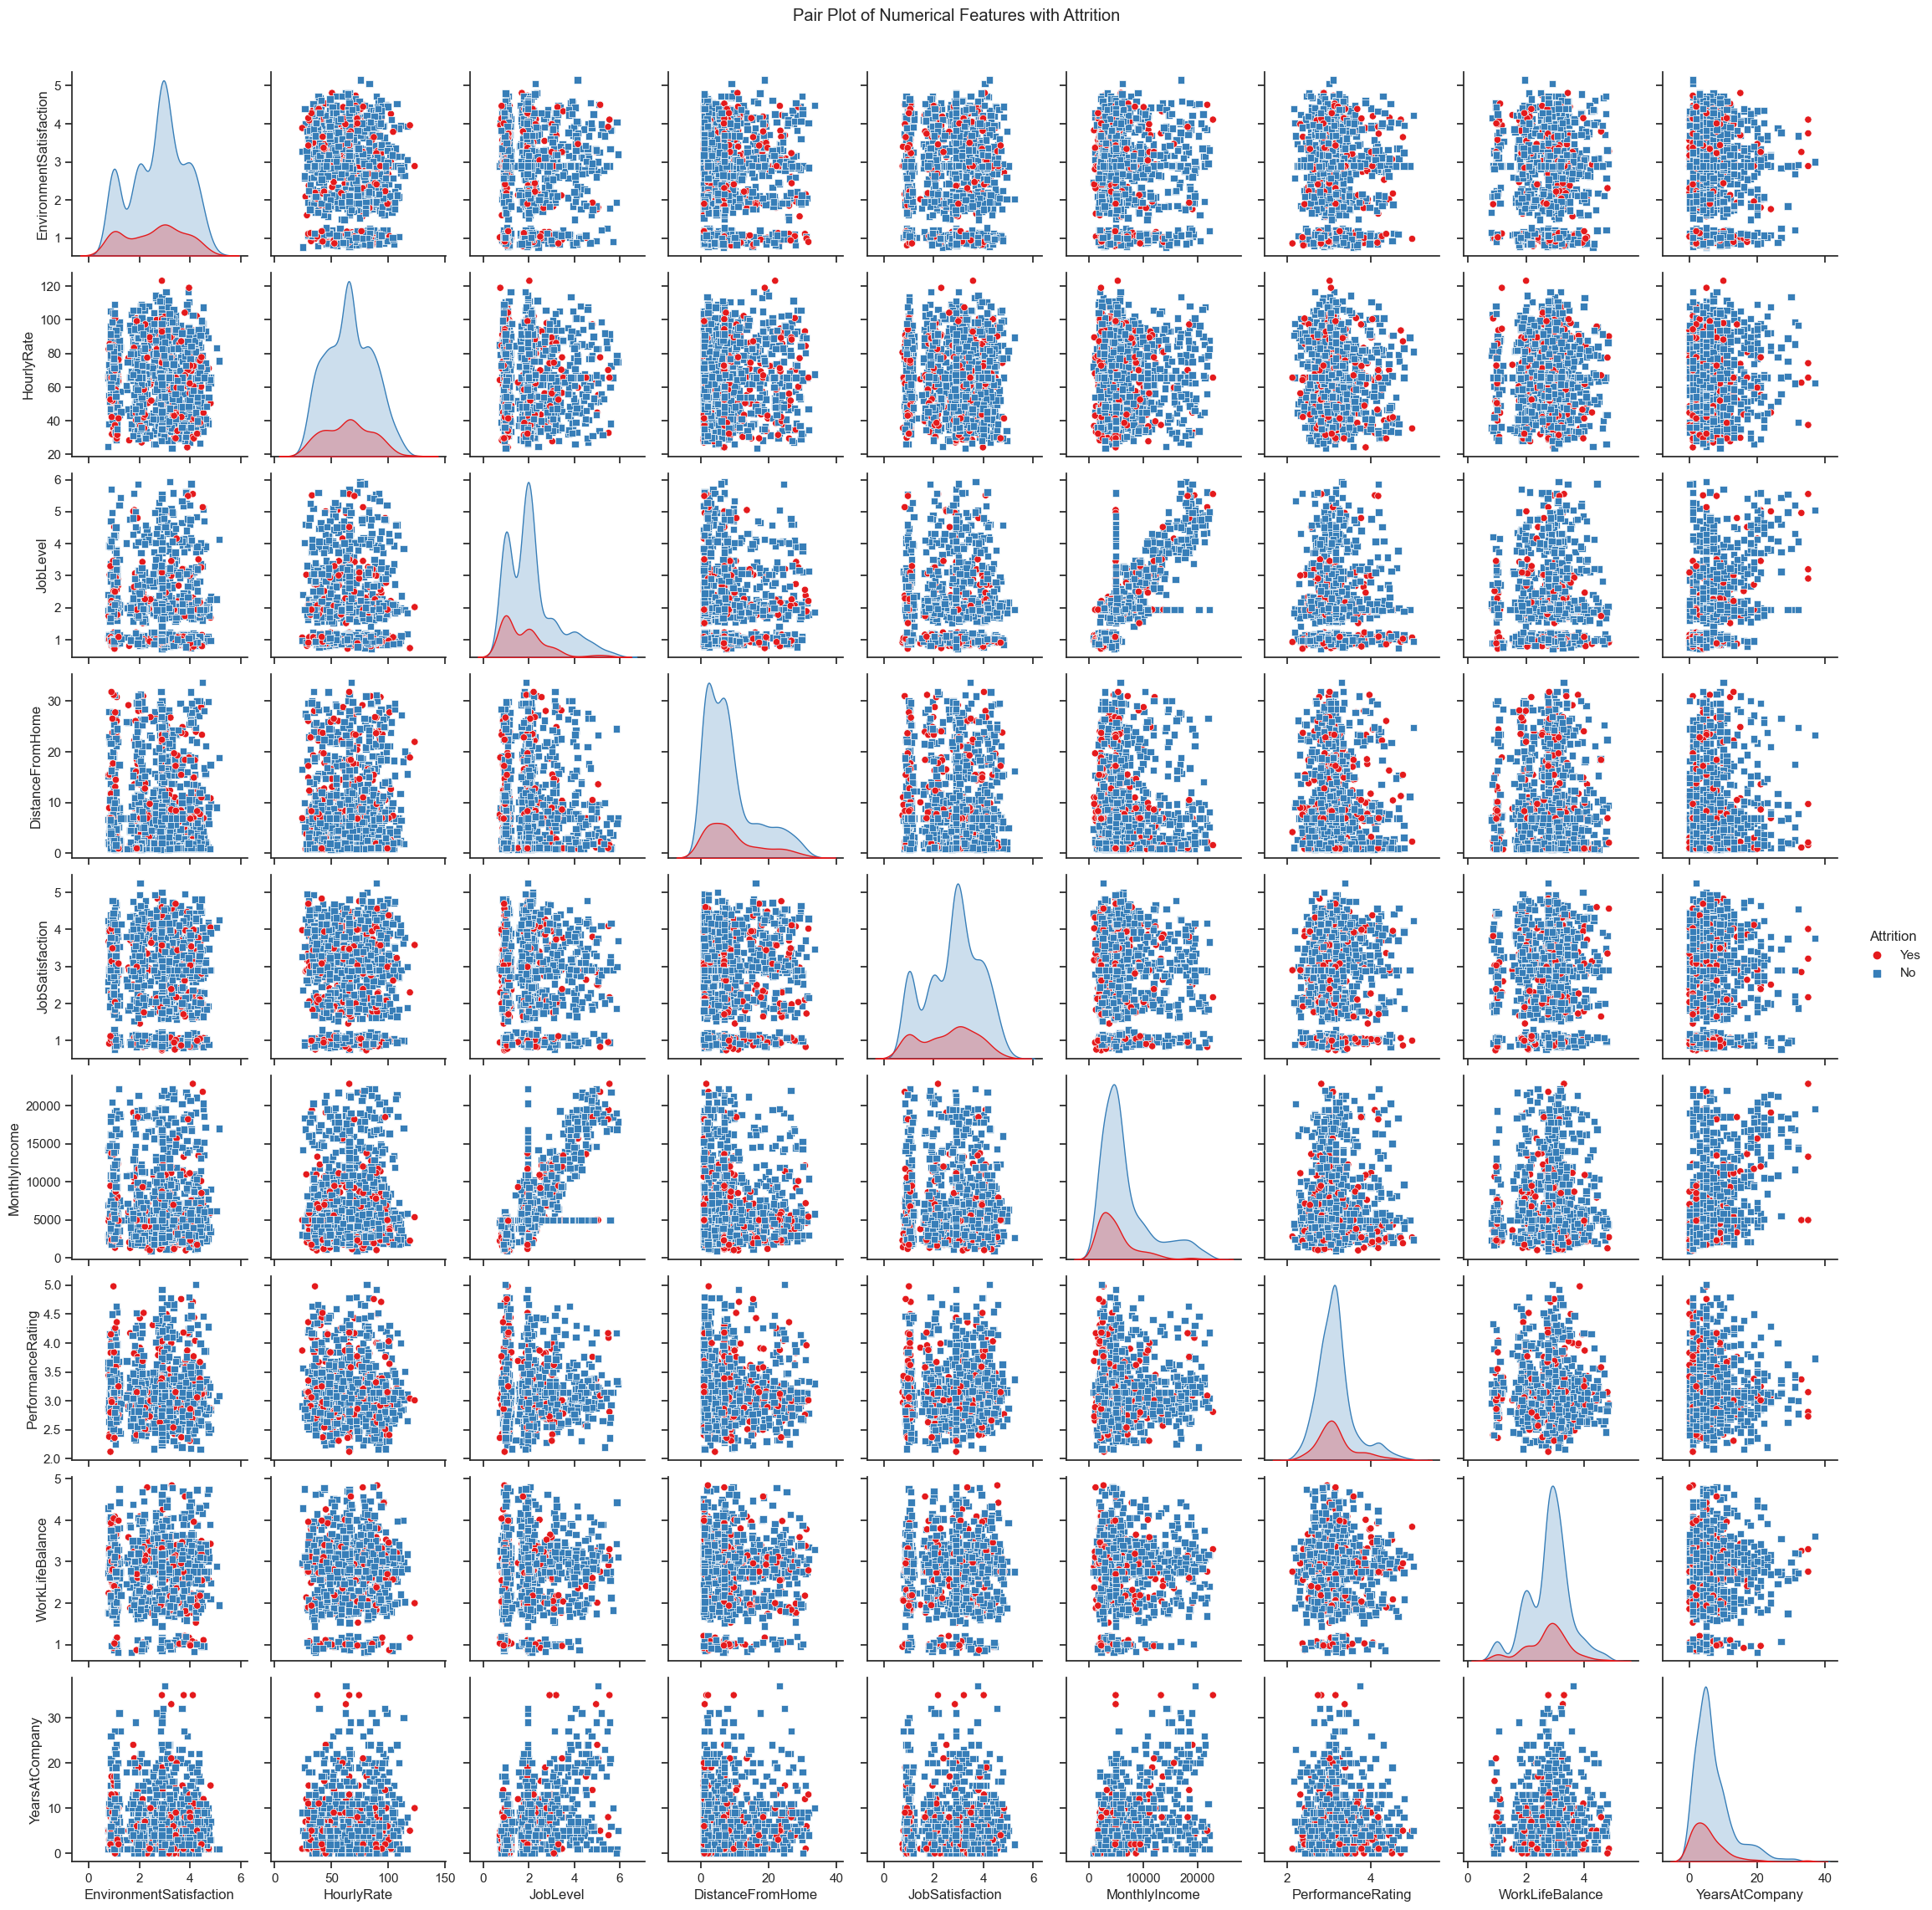

In [2885]:
choosen_features = ['EnvironmentSatisfaction', 'HourlyRate', 'JobLevel', 'DistanceFromHome',
                       'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating',
                       'WorkLifeBalance', 'YearsAtCompany', 'Attrition']
choosen_df = df[choosen_features]


sns.set(style="ticks")
sns.pairplot(choosen_df, hue='Attrition', markers=["o", "s"], palette="Set1")
plt.suptitle("Pair Plot of Numerical Features with Attrition", y=1.02)
plt.show()

Pre-processing

In [2886]:
total_features = len(df.columns)
print("Total number of features:", total_features)

Total number of features: 31


In [2887]:
all_features = df.columns.tolist()
print("List of all features:")
print(all_features)

List of all features:
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [2888]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Drop the target variable 'Attrition' for now

In [2889]:
X = df.drop('Attrition', axis=1).copy()

In [2890]:
numerical_columns = X.select_dtypes(include=['int64', 'int32', 'float64', 'bool']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

Encoding

Standardize numerical features

In [2891]:
scaler = StandardScaler()
X_scaled = X.copy() 
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

Encode categorical variables

In [2892]:
label_encoder = LabelEncoder()
X[categorical_columns] = X[categorical_columns].apply(label_encoder.fit_transform)

Encode binary categorical variables using one-hot encoding

In [2893]:
X = pd.get_dummies(X, columns=['Gender', 'Over18', 'OverTime'], drop_first=True)

After these preprocessing steps, our data in the DataFrame is ready for PCA. We can now proceed to apply PCA to reduce the dimensionality of our data

We split the data into training and testing sets 10% because of the dimension of our DataFrame. The features are stored in X, and our target variable 'Attrition' is extracted from the DataFrame

In [2894]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Attrition'], test_size=0.1, random_state=42)

Apply PCA

In [2895]:
from sklearn.decomposition import PCA

We are going to try to preserve as much variance as possible and we should pick the eigenvectors with the biggest eigenvalues, because they are going to capture the most data

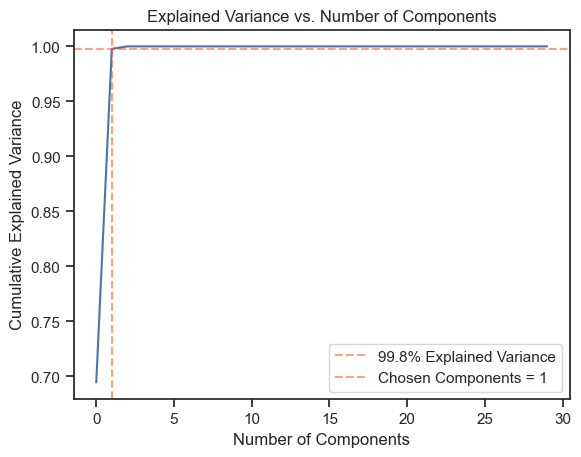

In [2896]:
pca = PCA()
X_pca = pca.fit_transform(X_train)  

plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('Number of Components') 
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(0.998, color='orangered', alpha=0.5, ls='--', label='99.8% Explained Variance')

chosen_components = 1
plt.axvline(chosen_components, color='orangered', alpha=0.5, ls='--', label=f'Chosen Components = {chosen_components}')
plt.legend()
plt.show()

In [2897]:
pca = PCA(1)
projected = pca.fit_transform(X_train)

In [2898]:
projected.shape

(1179, 1)

In [2899]:
projected

array([[ -3242.58961429],
       [ 12748.77045982],
       [   -29.4087693 ],
       ...,
       [ -8341.7471347 ],
       [-10128.98249087],
       [  -669.77582222]])

In [2900]:
df_pca = pd.DataFrame(projected, columns =['C1'])
df_pca["Attrition"] = df["Attrition"]
df_pca.head()

C1 Attrition
0  -3242.589614       Yes
1  12748.770460        No
2    -29.408769       Yes
3    -72.138403        No
4    -39.567506        No

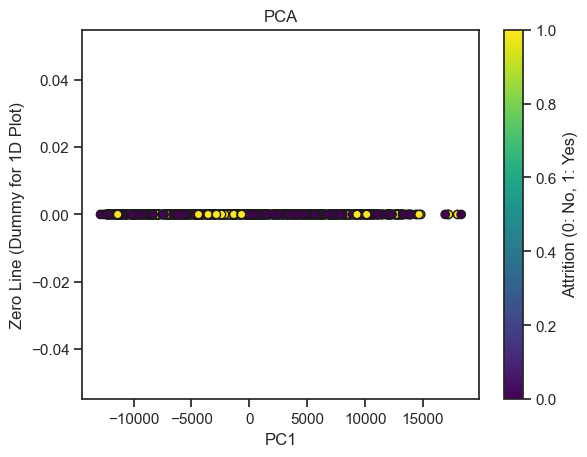

In [2901]:
color_mapping = {'Yes': 1, 'No': 0}
colors = y_train.map(color_mapping)

plt.scatter(X_train_pca, np.zeros_like(X_train_pca), c=colors, cmap='viridis', edgecolor='k', alpha=1)
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('Zero Line (Dummy for 1D Plot)')
plt.colorbar(label='Attrition (0: No, 1: Yes)')
plt.show()

Apply LDA

In [2902]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, y_train)

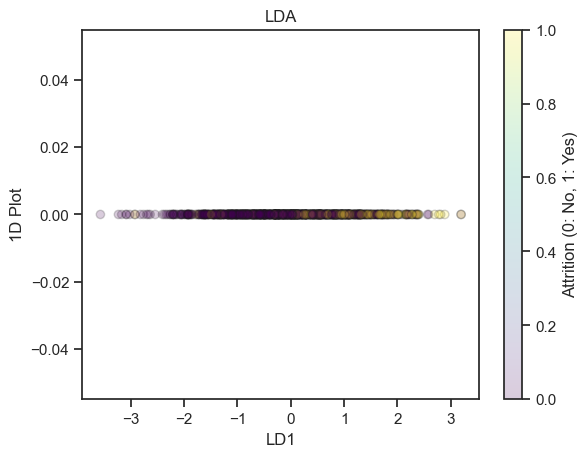

In [2903]:
plt.scatter(X_lda, np.zeros_like(X_lda), c=y_train.map(color_mapping), cmap='viridis', edgecolor='k', alpha=0.2)
plt.title('LDA')
plt.xlabel('LD1')
plt.ylabel('1D Plot')
plt.colorbar(label='Attrition (0: No, 1: Yes)')
plt.show()

Statistical Techniques

Descriptive Statistical Analyses

In [2904]:
from scipy import stats

In [2905]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      42       Yes      Travel_Rarely     990.11                   Sales   
1      52        No  Travel_Frequently     276.78  Research & Development   
2      33       Yes      Travel_Rarely    1204.16  Research & Development   
3      35        No  Travel_Frequently    1352.75                   Sales   
4      25        No      Travel_Rarely     485.05  Research & Development   
...   ...       ...                ...        ...                     ...   
1464   28        No      Travel_Rarely    1277.64                   Sales   
1465   37        No  Travel_Frequently     914.06  Research & Development   
1466   35        No      Travel_Rarely     574.68  Research & Development   
1467   27        No      Travel_Rarely     151.51  Research & Development   
1469   38        No      Travel_Rarely     703.68  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1.02       1.77  Life Sciences                     2.15   
1                 6.92       1.04  Life Sciences                     3.47   
2                 2.20       2.12          Other                     3.98   
3                 2.94       3.67  Life Sciences                     3.73   
4                 1.99       1.12        Medical                     1.08   
...                ...        ...            ...                      ...   
1464              5.13       3.23          Other                     4.39   
1465             21.65       2.92        Medical                     3.17   
1466              6.03       1.12        Medical                     4.28   
1467              6.92       3.48  Life Sciences                     2.15   
1469              7.23       3.29        Medical                     1.74   

      Gender  ...  PercentSalaryHike  PerformanceRating  \
0       Male  ...               9.90               2.84   
1       Male  ...              14.49               4.12   
2       Male  ...              15.40               2.78   
3     Female  ...               9.76               2.77   
4       Male  ...              11.92               3.28   
...      ...  ...                ...                ...   
1464  Female  ...              16.39               2.86   
1465    Male  ...              17.92               2.97   
1466    Male  ...              14.69               2.80   
1467    Male  ...              18.74               3.15   
1469    Male  ...              10.34               3.05   

      RelationshipSatisfaction TotalWorkingYears  TrainingTimesLastYear  \
0                         1.01                 8                      0   
1                         4.31                 9                      3   
2                         2.33                 8                      3   
3                         3.03                 8                      3   
4                         2.89                 6                      3   
...                        ...               ...                    ...   
1464                      4.56                 5                      2   
1465                      3.02                 9                      3   
1466                      1.01                 9                      5   
1467                      1.95                 6                      0   
1469                      1.08                 6                      3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0               1.05               6                   4   
1               2.53              10                   8   
2               2.92               0                   0   
3               3.12               8                   6   
4               3.11               2                   2   
...              ...             ...                 ...   
1464            3.11               4                   2   
1465            2.82               5                   2   
1466  

Let's compute the descriptive statistics for all the numerical variables. Here, we can see measures of central tendency such as Mean, Median, and Mode, as well as measures of dispersion like Standard Deviation. Measures of dispersion quantify how spread out or dispersed the values in a dataset are. Standard Deviation specifically measures the average deviation of each data point from the mean of the dataset

In [2906]:
descriptive_stats = df.describe()
descriptive_stats

Age    DailyRate  DistanceFromHome    Education  \
count  1310.000000  1310.000000       1310.000000  1310.000000   
mean     36.680916   802.091290          8.818344     2.938290   
std       9.283524   392.541806          7.762956     1.011391   
min      15.000000    86.830000          0.750000     0.770000   
25%      30.000000   493.810000          2.252500     2.220000   
50%      36.000000   801.390000          6.920000     2.920000   
75%      42.000000  1103.182500         11.522500     3.610000   
max      67.000000  1784.390000         33.680000     6.290000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1310.000000  1310.000000     1310.000000  1310.000000   
mean                  2.725290    65.701786        2.744832     2.039947   
std                   1.074811    20.292845        0.725082     1.074670   
min                   0.760000    23.860000        0.830000     0.720000   
25%                   1.940000    49.315000        2.240000     1.062500   
50%                   2.890000    65.650000        2.780000     1.940000   
75%                   3.487500    81.462500        3.140000     2.280000   
max                   5.150000   123.200000        5.240000     5.940000   

       JobSatisfaction  MonthlyIncome  ...  PercentSalaryHike  \
count      1310.000000    1310.000000  ...        1310.000000   
mean          2.746840    6384.171817  ...          15.229466   
std           1.079498    4553.218610  ...           3.796915   
min           0.740000     891.480000  ...           7.680000   
25%           1.960000    3149.305000  ...          12.452500   
50%           2.900000    4954.750000  ...          14.490000   
75%           3.557500    7541.317500  ...          17.110000   
max           5.250000   22858.020000  ...          29.420000   

       PerformanceRating  RelationshipSatisfaction  TotalWorkingYears  \
count        1310.000000               1310.000000        1310.000000   
mean            3.148290                  2.721534          11.192366   
std             0.449576                  1.061521           7.688627   
min             2.120000                  0.720000           0.000000   
25%             2.870000                  1.952500           6.000000   
50%             3.120000                  2.890000           9.000000   
75%             3.300000                  3.447500          14.000000   
max             5.010000                  4.980000          44.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1310.000000      1310.000000     1310.000000   
mean                2.832824         2.767198        6.722901   
std                 1.258247         0.721796        5.712652   
min                 0.000000         0.810000        0.000000   
25%                 2.000000         2.310000        3.000000   
50%                 3.000000         2.820000        5.000000   
75%                 3.000000         3.170000        9.000000   
max                 8.000000         4.840000       37.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1310.000000              1310.000000           1310.000000  
mean             4.130534                 2.061832              4.031298  
std              3.513445                 3.076314              3.443278  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 2.000000              7.000000  
max             19.000000                17.000000             20.000000  

[8 rows x 22 columns]

Frequency Distributions for categorical variables

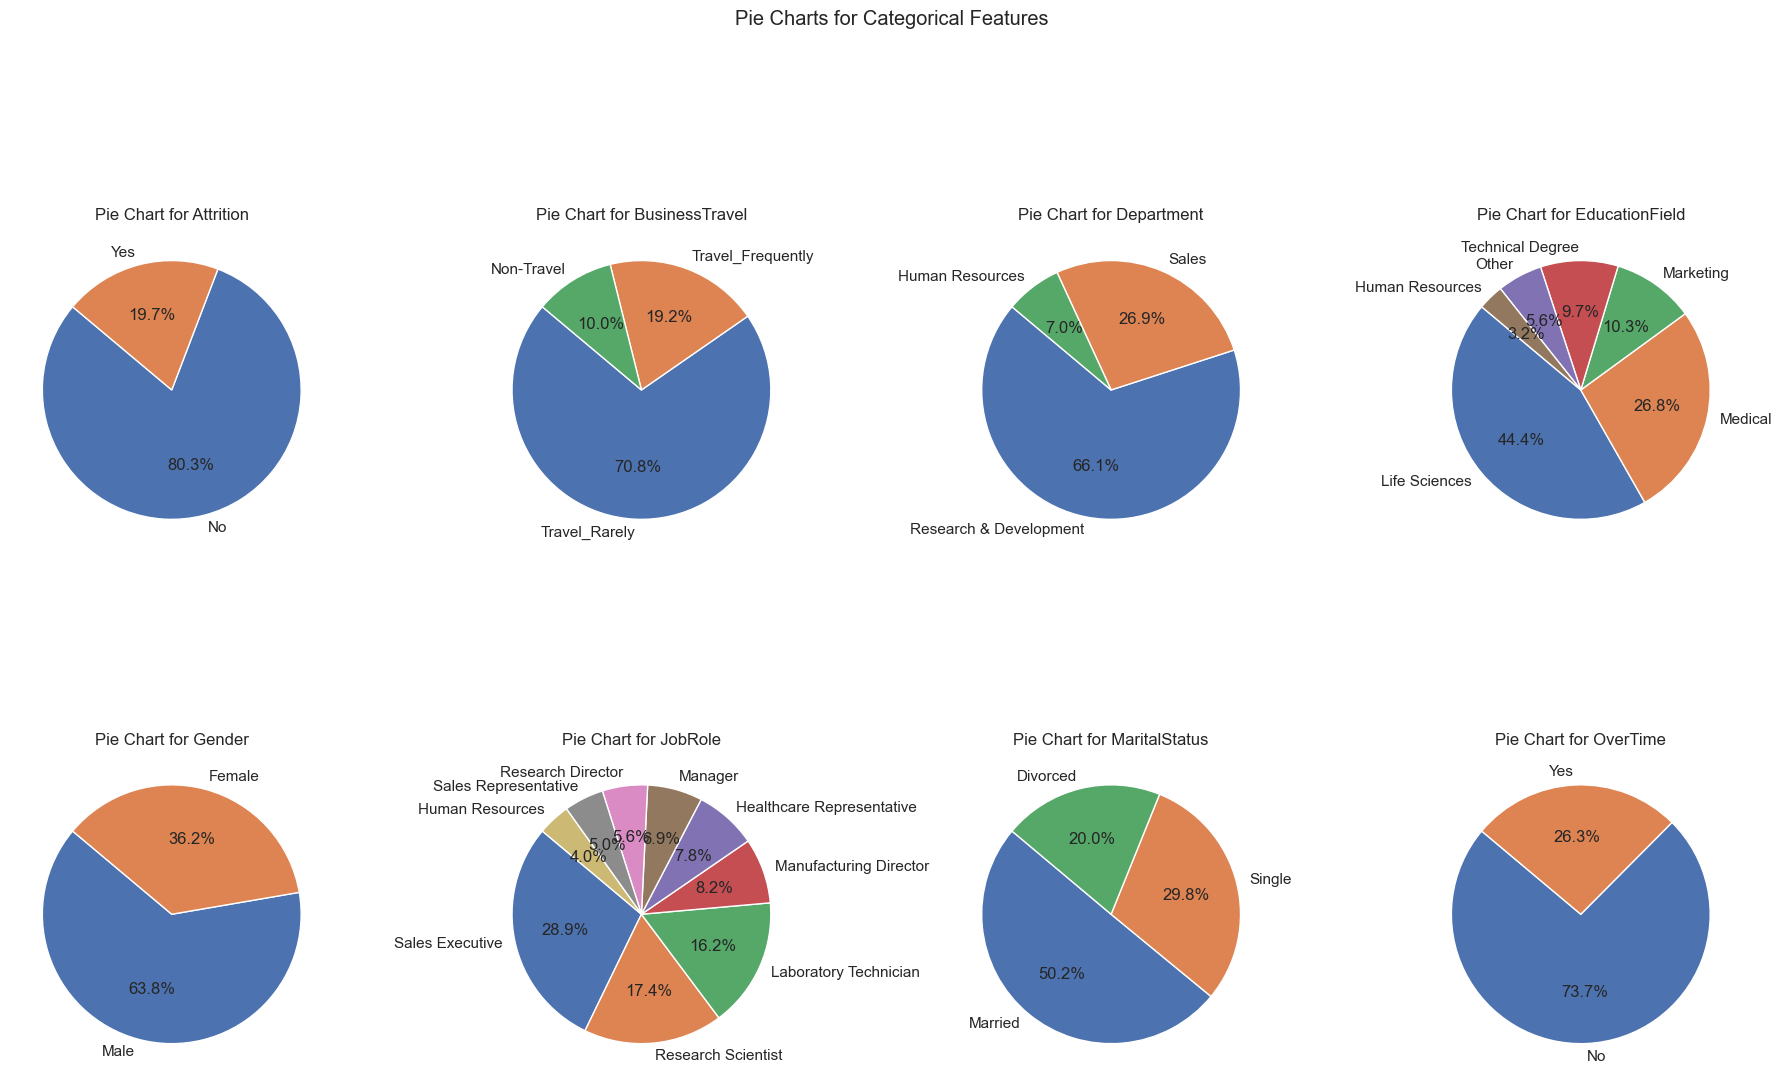

In [2907]:
plt.figure(figsize=(18, 12))

for i, feature in enumerate(df.select_dtypes(include=['object']).columns, 1):
    plt.subplot(2, 4, i) 

    labels = df[feature].value_counts().index
    sizes = df[feature].value_counts().values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    
    plt.title(f'Pie Chart for {feature}')

plt.suptitle('Pie Charts for Categorical Features', y=1.02)
plt.tight_layout()
plt.show()

As our target variable Attrition has lot of variables which can be considered relevants for his prediction, we are going to analyze them using a correlation matrix. Before of it, we are going to analysize our features with the relative frequency


In [2908]:
value_counts = df['OverTime'].value_counts()
relative_frequencies = value_counts / len(df)

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

State  Frequency  Relative Frequency
0    No        965            0.736641
1   Yes        345            0.263359

The most frequent OverTime is No, with a relative frequency of 73.6%

In [2909]:
value_counts = df['MaritalStatus'].value_counts()
relative_frequencies = value_counts / len(df)

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

State  Frequency  Relative Frequency
0   Married        657            0.501527
1    Single        391            0.298473
2  Divorced        262            0.200000

The most frequent MaritalStatus is Married, with a relative frequency of 50.1%

In [2910]:
value_counts = df['JobRole'].value_counts()
relative_frequencies = value_counts / len(df)

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

State  Frequency  Relative Frequency
0            Sales Executive        379            0.289313
1         Research Scientist        228            0.174046
2      Laboratory Technician        212            0.161832
3     Manufacturing Director        107            0.081679
4  Healthcare Representative        102            0.077863
5                    Manager         90            0.068702
6          Research Director         74            0.056489
7       Sales Representative         65            0.049618
8            Human Resources         53            0.040458

The most frequent JobRole is Sales Executive, with a relative frequency of 28.9%

In [2911]:
value_counts = df['DistanceFromHome'].value_counts()
relative_frequencies = value_counts / len(df)

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

State  Frequency  Relative Frequency
0     6.92        132            0.100763
1     1.02         10            0.007634
2     0.94         10            0.007634
3     1.03          9            0.006870
4     0.97          8            0.006107
..     ...        ...                 ...
810   8.03          1            0.000763
811   3.15          1            0.000763
812  11.04          1            0.000763
813   2.68          1            0.000763
814  21.65          1            0.000763

[815 rows x 3 columns]

The most frequent DistanceFromHome is 7km, with a relative frequency of 10%

In [2912]:
value_counts = df['NumCompaniesWorked'].value_counts()
relative_frequencies = value_counts / len(df)

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

State  Frequency  Relative Frequency
0       1        425            0.324427
1       2        258            0.196947
2       0        165            0.125954
3       3        120            0.091603
4       4        100            0.076336
5       7         55            0.041985
6       8         51            0.038931
7       5         50            0.038168
8       6         48            0.036641
9       9         29            0.022137
10     10          8            0.006107
11     11          1            0.000763

The most frequent NumCompaniesWorked is 1, with a relative frequency of 32.4% 

In [2913]:
value_counts = df['TotalWorkingYears'].value_counts()
relative_frequencies = value_counts / len(df)

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

State  Frequency  Relative Frequency
0       9        226            0.172519
1       6         96            0.073282
2       8         86            0.065649
3      10         86            0.065649
4       7         79            0.060305
5      11         79            0.060305
6       5         74            0.056489
7       1         64            0.048855
8       4         45            0.034351
9      13         34            0.025954
10      3         32            0.024427
11     12         31            0.023664
12     17         30            0.022901
13     14         30            0.022901
14      2         28            0.021374
15     20         28            0.021374
16     16         25            0.019084
17     18         23            0.017557
18     22         22            0.016794
19     23         21            0.016031
20     15         21            0.016031
21     19         17            0.012977
22     27         17            0.012977
23     24         15            0.011450
24     21         13            0.009924
25     25          9            0.006870
26     32          9            0.006870
27     26          9            0.006870
28     28          9            0.006870
29      0          8            0.006107
30     34          6            0.004580
31     30          6            0.004580
32     36          5            0.003817
33     29          5            0.003817
34     33          5            0.003817
35     31          4            0.003053
36     35          3            0.002290
37     37          3            0.002290
38     38          2            0.001527
39     43          2            0.001527
40     41          2            0.001527
41     44          1            0.000763

The most frequent TotalWorkingYears is 9, with a relative frequency of 17.2% 

In [2914]:
value_counts = df['MonthlyIncome'].value_counts()
relative_frequencies = value_counts / len(df)

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

State  Frequency  Relative Frequency
0      4954.75        132            0.100763
1      6438.95          1            0.000763
2      5035.63          1            0.000763
3      6251.18          1            0.000763
4     13626.34          1            0.000763
...        ...        ...                 ...
1174   2249.36          1            0.000763
1175   3139.61          1            0.000763
1176  18929.81          1            0.000763
1177   2001.37          1            0.000763
1178   5188.88          1            0.000763

[1179 rows x 3 columns]

The most frequent MonthlyIncome is 4954.75, with a relative frequency of 10% 

In [2915]:
value_counts = df['JobSatisfaction'].value_counts()
relative_frequencies = value_counts / len(df)

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

State  Frequency  Relative Frequency
0     2.90        140            0.106870
1     1.02         15            0.011450
2     1.00         15            0.011450
3     1.05         14            0.010687
4     0.97         11            0.008397
..     ...        ...                 ...
345   1.22          1            0.000763
346   3.43          1            0.000763
347   2.51          1            0.000763
348   1.46          1            0.000763
349   1.80          1            0.000763

[350 rows x 3 columns]

The most frequent JobSatisfaction is 2.90, with a relative frequency of 10.6% 

Correlation matrix 

We want to be sure we have encoded all the features into numerical

In [2916]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = label_encoder.fit_transform(df[i])
df.dtypes

Age                           int32
Attrition                     int32
BusinessTravel                int32
DailyRate                   float64
Department                    int32
DistanceFromHome            float64
Education                   float64
EducationField                int32
EnvironmentSatisfaction     float64
Gender                        int32
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                       int32
JobSatisfaction             float64
MaritalStatus                 int32
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked            int32
Over18                         bool
OverTime                      int32
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
TotalWorkingYears             int32
TrainingTimesLastYear         int32
WorkLifeBalance             float64
YearsAtCompany              

In [2917]:
correlation_matrix = df.corr()
print(correlation_matrix['Attrition'].sort_values(ascending=False))

Attrition                   1.000000
OverTime                    0.178908
MaritalStatus               0.111452
JobRole                     0.058003
DistanceFromHome            0.051687
NumCompaniesWorked          0.030702
Over18                      0.026028
Gender                      0.025376
MonthlyRate                 0.023066
PerformanceRating           0.022557
PercentSalaryHike           0.018751
Department                  0.016813
EducationField              0.002300
Education                  -0.006567
BusinessTravel             -0.016725
RelationshipSatisfaction   -0.028990
HourlyRate                 -0.029725
YearsSinceLastPromotion    -0.032428
WorkLifeBalance            -0.038620
TrainingTimesLastYear      -0.039478
EnvironmentSatisfaction    -0.058893
DailyRate                  -0.063026
JobInvolvement             -0.080604
JobSatisfaction            -0.081548
YearsAtCompany             -0.091935
YearsInCurrentRole         -0.093827
Age                        -0.100664
Y

<Axes: >

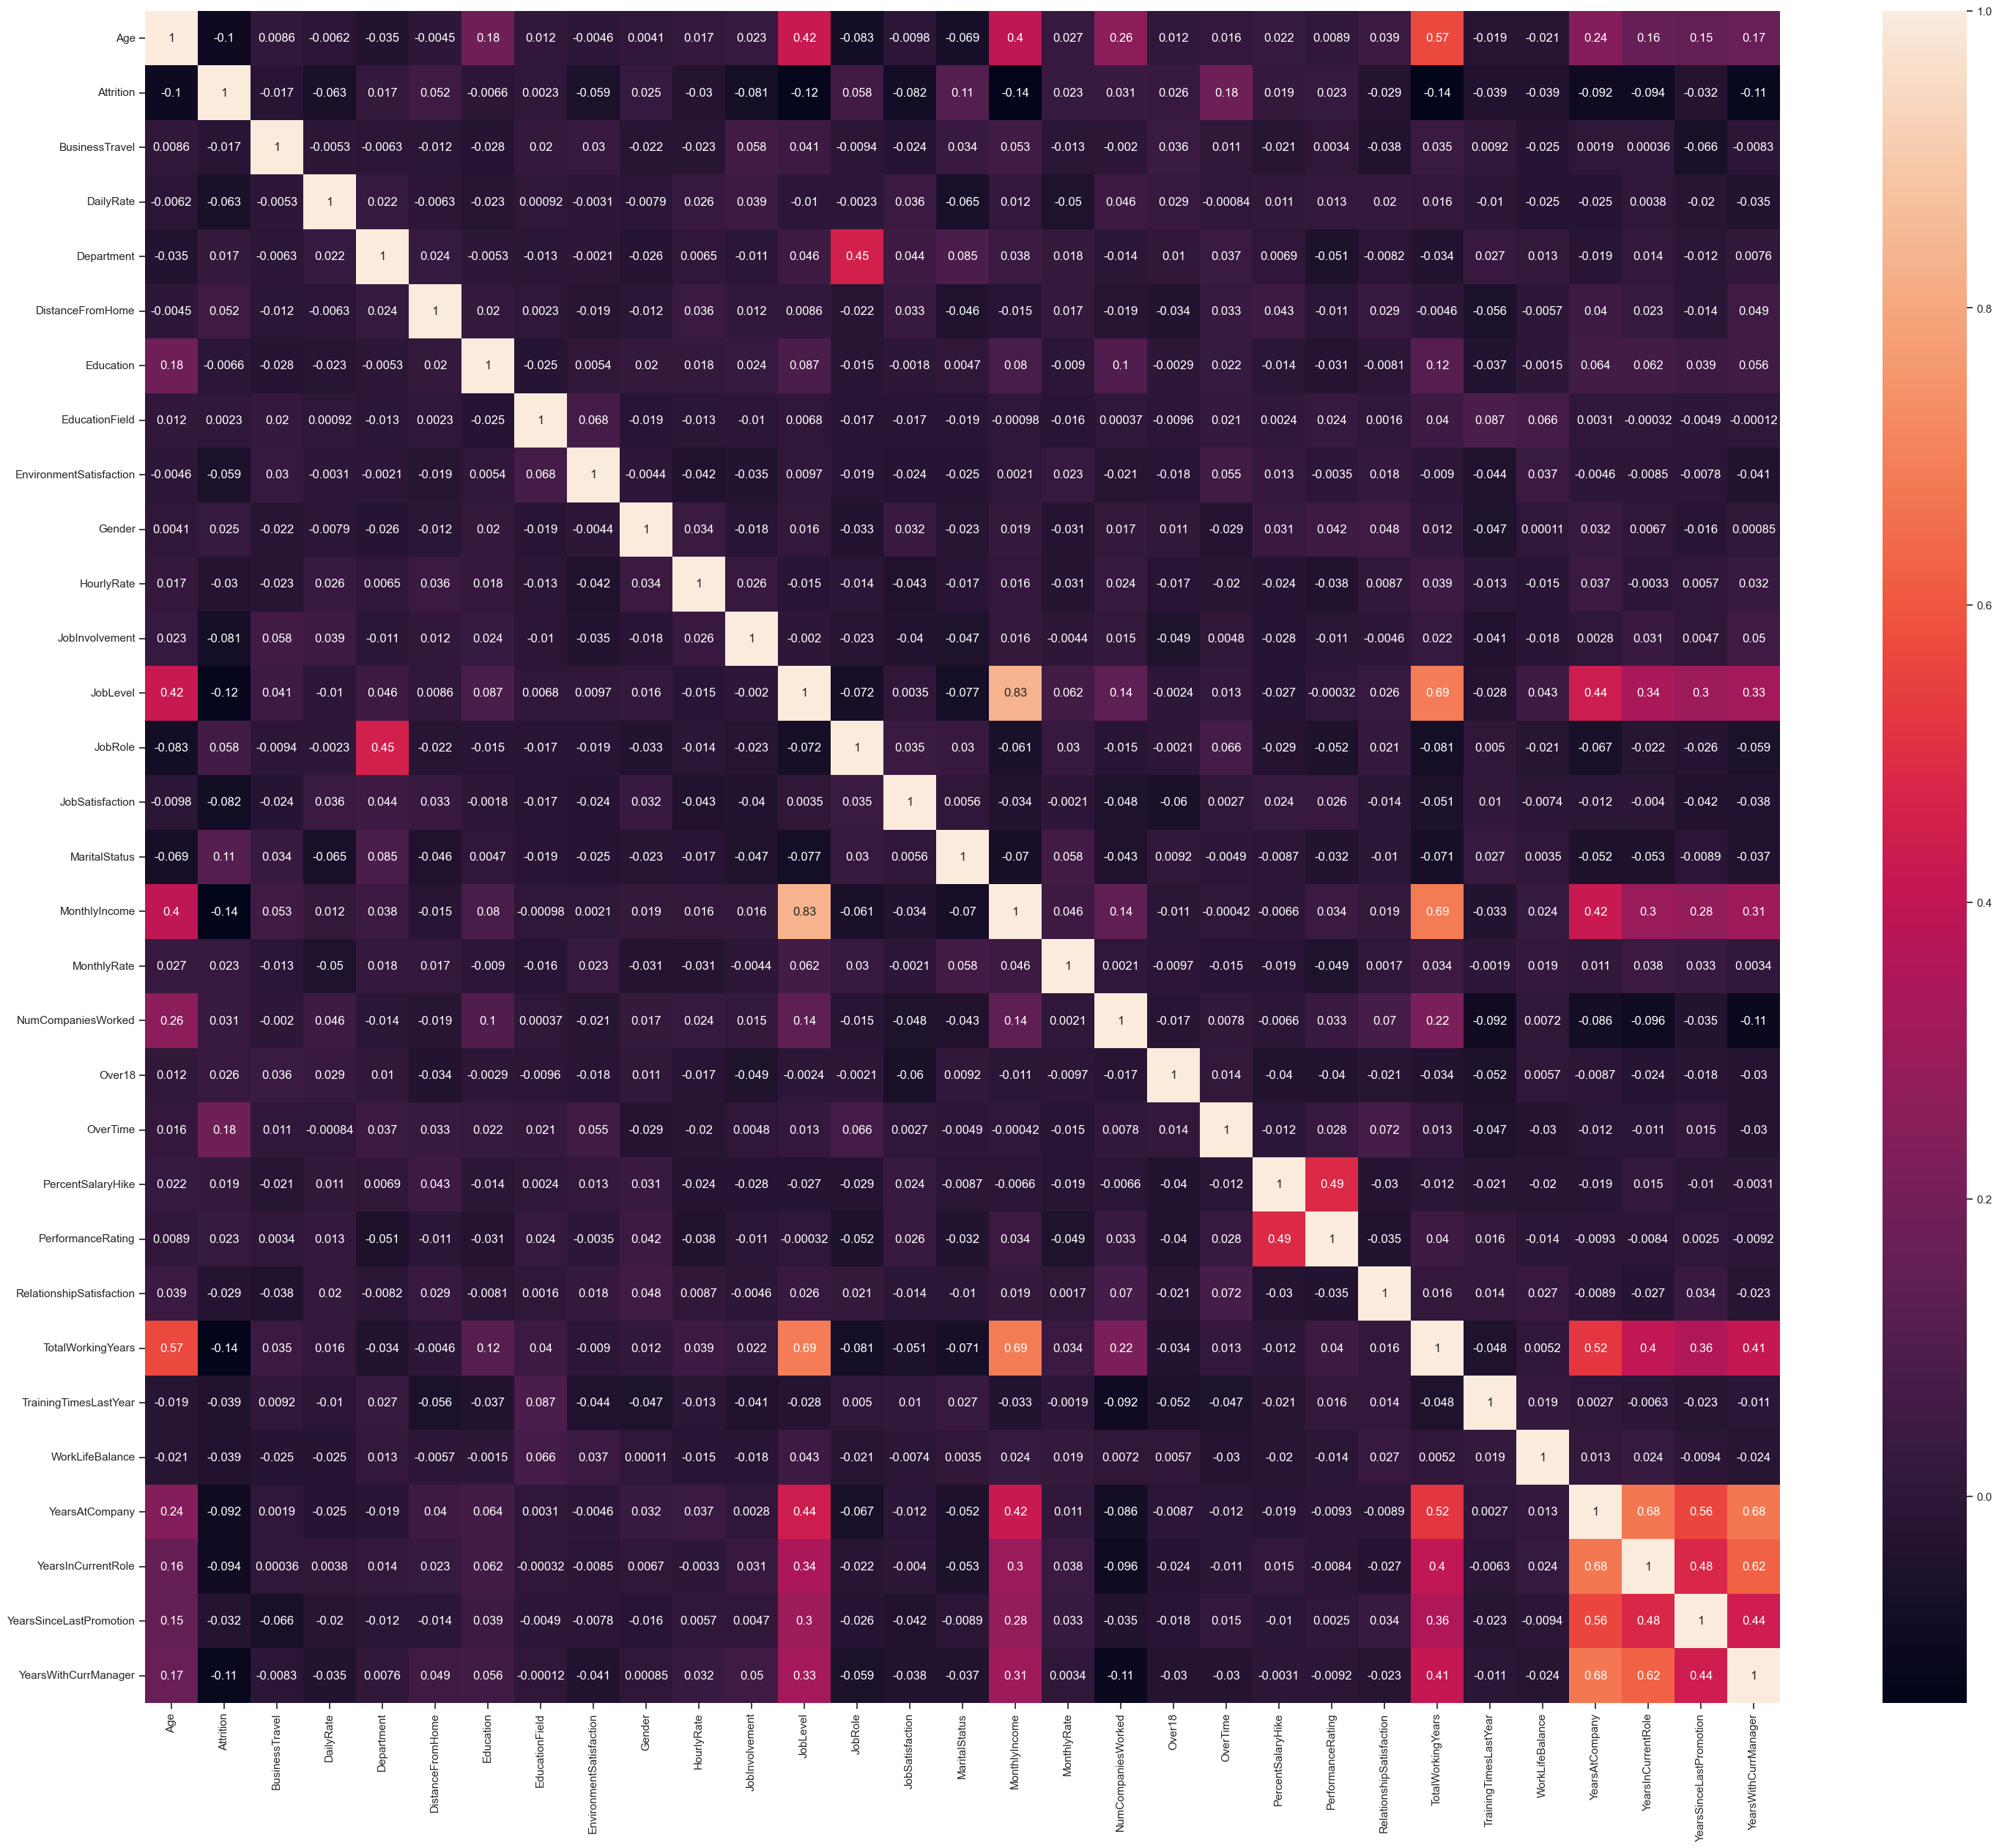

In [2918]:
plt.figure(figsize = (36,30))
sns.heatmap(df.corr() , annot = True)

In [2919]:
attrition_corr_vector = correlation_matrix['Attrition'].sort_values(ascending = False)
attrition_corr_vector

Attrition                   1.000000
OverTime                    0.178908
MaritalStatus               0.111452
JobRole                     0.058003
DistanceFromHome            0.051687
NumCompaniesWorked          0.030702
Over18                      0.026028
Gender                      0.025376
MonthlyRate                 0.023066
PerformanceRating           0.022557
PercentSalaryHike           0.018751
Department                  0.016813
EducationField              0.002300
Education                  -0.006567
BusinessTravel             -0.016725
RelationshipSatisfaction   -0.028990
HourlyRate                 -0.029725
YearsSinceLastPromotion    -0.032428
WorkLifeBalance            -0.038620
TrainingTimesLastYear      -0.039478
EnvironmentSatisfaction    -0.058893
DailyRate                  -0.063026
JobInvolvement             -0.080604
JobSatisfaction            -0.081548
YearsAtCompany             -0.091935
YearsInCurrentRole         -0.093827
Age                        -0.100664
Y

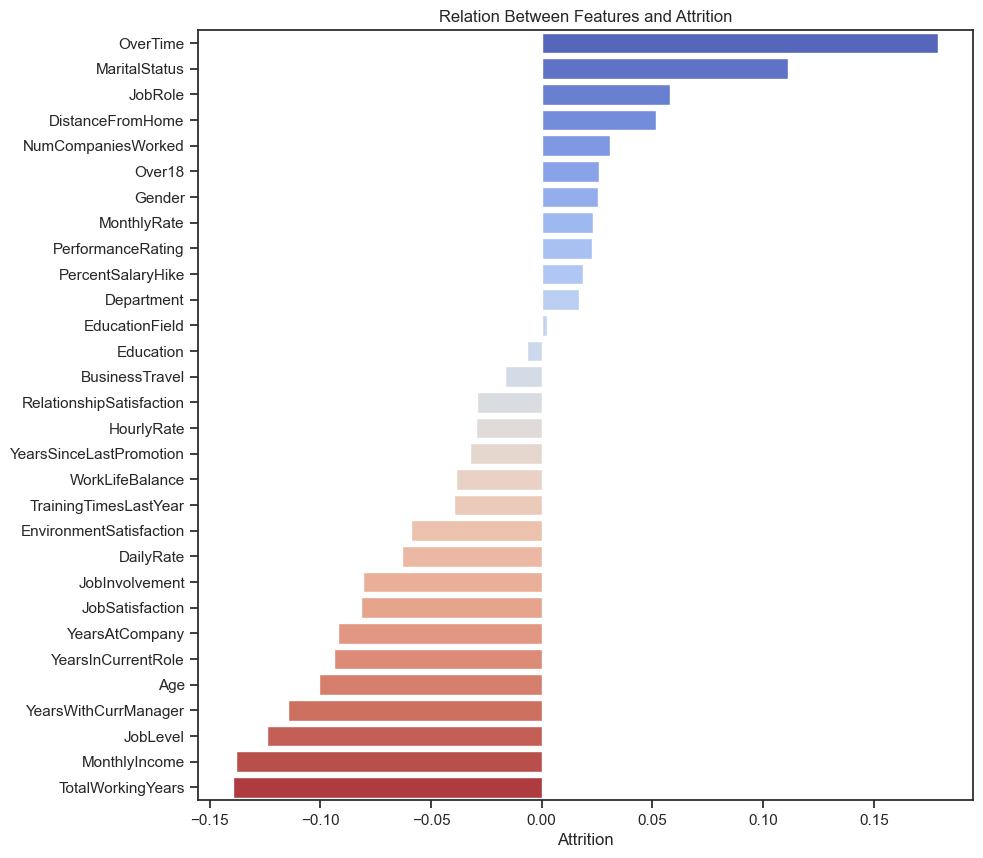

In [2920]:
plt.figure(figsize=(10, 10))
sns.barplot(x=attrition_corr_vector.drop('Attrition'), y=attrition_corr_vector.drop('Attrition').index, palette='coolwarm')
plt.title('Relation Between Features and Attrition')
plt.show()

While negative correlations can highlight factors associated with lower attrition, they may not directly indicate the reasons behind attrition. This is why we chose positive & negative values as well of the correlation matrix we just did. We also add JobSatisfaction as reason_of_attrition_chosen

In [2921]:
reason_of_attrition_chosen = 'OverTime', 'MaritialStatus', 'JobRole', 'DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'MonthlyIncome', 'JobSatisfaction'

In [2922]:
reason_of_attrition_chosen = ['OverTime', 'MaritalStatus', 'JobRole', 'DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'MonthlyIncome','JobSatisfaction']
chosen_features_corr = attrition_corr_vector.loc[reason_of_attrition_chosen]

print(f"Correlation with Attrition for Chosen Features:")
for feature in chosen_features_corr.index:
    correlation_value = chosen_features_corr[feature]
    print(f"{feature}: {correlation_value}")

Correlation with Attrition for Chosen Features:
OverTime: 0.17890804531309443
MaritalStatus: 0.11145201213995101
JobRole: 0.05800251080888211
DistanceFromHome: 0.051686682533385035
NumCompaniesWorked: 0.03070241504329511
TotalWorkingYears: -0.13926623444084954
MonthlyIncome: -0.13804998724929374
JobSatisfaction: -0.08154831921179398


Pie Chart for Relative Frequencies

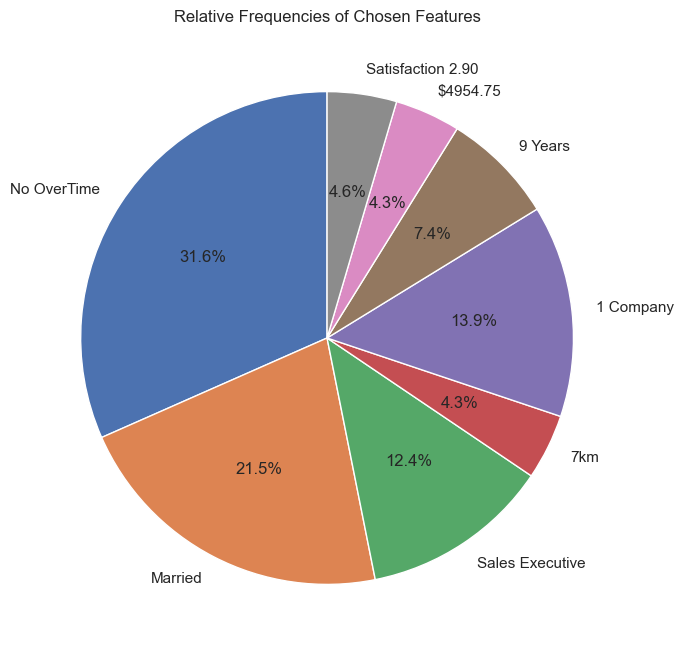

In [2923]:
labels = ['No OverTime', 'Married', 'Sales Executive', '7km', '1 Company', '9 Years', '$4954.75', 'Satisfaction 2.90']
sizes = [73.6, 50.1, 28.9, 10, 32.4, 17.2, 10, 10.6]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Relative Frequencies of Chosen Features')
plt.show()

Hypothesis Formulation and Testing

We apply a t-test when comparing means between two groups or levels, suitable for binary or two-level categorical variables. We Use ANOVA for comparing means across multiple groups or levels, especially with categorical variables featuring more than two levels. Based on our reason_of_attrition_chosen, we would like to apply:

T-test:

OverTime (Binary categorical variable)

MaritalStatus (Categorical variable with multiple levels, but we can perform pairwise t-tests for each level against the others)


ANOVA:

JobRole (Categorical variable with multiple levels)

DistanceFromHome (Numerical variable, but if we categorize it into groups, we can use ANOVA)

NumCompaniesWorked (Numerical variable, but if we categorize it into groups, we can use ANOVA)

TotalWorkingYears (Numerical variable, but if we categorize it into groups, we can use ANOVA)

MonthlyIncome (Numerical variable, but if ywe categorize it into groups, we can use ANOVA)

JobSatisfaction (Categorical variable with multiple levels)

In [2924]:
from scipy.stats import f_oneway

Features for t-tests

In [2925]:
t_test_features = ['OverTime', 'MaritalStatus']

Features for ANOVA

In [2926]:
anova_features = ['JobRole', 'DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'MonthlyIncome', 'JobSatisfaction']


Perform T-tests

In [2927]:
for feature in t_test_features:
    attrition_values = df[df['Attrition'] == 1][feature]
    no_attrition_values = df[df['Attrition'] == 0][feature]
    
    t_stat, p_value = ttest_ind(attrition_values, no_attrition_values, equal_var=False)
    
    print(f"\nT-test for {feature}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    
    alpha = 0.05  
    if p_value < alpha:
        print("Result: Reject H0 - There is enough evidence to say that the means are different.")
    else:
        print("Result: Fail to reject H0 - There is not enough evidence to say that the means are different.")



T-test for OverTime:
T-statistic: 5.9341511909393265
P-value: 7.075110922039793e-09
Result: Reject H0 - There is enough evidence to say that the means are different.

T-test for MaritalStatus:
T-statistic: 3.9739671187379044
P-value: 8.445994736079258e-05
Result: Reject H0 - There is enough evidence to say that the means are different.


Perform ANOVA

In [2928]:
for feature in anova_features:
    groups = [df[df['Attrition'] == attrition][feature] for attrition in [0, 1]]
    
    f_stat, p_value = f_oneway(*groups)
    
    print(f"\nANOVA for {feature}:")
    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_value}")
    
    alpha = 0.05  
    if p_value < alpha:
        print("Result: Reject H0 - There is enough evidence to say that at least one group mean is different.")
    else:
        print("Result: Fail to reject H0 - There is not enough evidence to say that all group means are different.")



ANOVA for JobRole:
F-statistic: 4.415347483204109
P-value: 0.03580794188587535
Result: Reject H0 - There is enough evidence to say that at least one group mean is different.

ANOVA for DistanceFromHome:
F-statistic: 3.503699380883718
P-value: 0.06145493310126417
Result: Fail to reject H0 - There is not enough evidence to say that all group means are different.

ANOVA for NumCompaniesWorked:
F-statistic: 1.2341342248286002
P-value: 0.26680870102516413
Result: Fail to reject H0 - There is not enough evidence to say that all group means are different.

ANOVA for TotalWorkingYears:
F-statistic: 25.870531069016057
P-value: 4.1825004214377577e-07
Result: Reject H0 - There is enough evidence to say that at least one group mean is different.

ANOVA for MonthlyIncome:
F-statistic: 25.411895868373723
P-value: 5.280387687639933e-07
Result: Reject H0 - There is enough evidence to say that at least one group mean is different.

ANOVA for JobSatisfaction:
F-statistic: 8.756600419924048
P-value: 0.0

Results indicate us significant differences in means for OverTime and MaritalStatus based on t-tests, while JobRole and JobSatisfaction show evidence of at least one group mean being different in ANOVA. However, no conclusive evidence is found for DistanceFromHome and NumCompaniesWorked in ANOVA, suggesting potential similarity in group means. We can then conclude that:
JobRole, 
TotalWorkingYears,
MonthlyIncome, 
JobSatisfaction,
might have varying impacts on Attrition.


Jupyter Notebook Analysis

12. Machine learning

● Provide a conceptual understanding and logical justification based on the reasoning for the specific
choice of machine learning approach (supervised/ Unsupervised) for the provided data set. You can
discuss the pros and cons of both approaches based on your understanding. (0-20 marks)

● Machine Learning models can be used for Prediction, Classification, and Clustering. You can choose
suitable features for the machine learning models based on feature selection methods, such as random
forest or any other method. The selection of hyperparameters for the ML models should be performed
by using hyperparameter tuning, such as GridSearchCV. Obtain the best accuracy using optimal values
of the hyperparameters. (0-30 marks)

● You should train and test the Machine learning models in the case of supervised learning for different
splits (at least 2 splits) and use appropriate metrics for unsupervised learning. Use k-fold (10 or 20 or 30) cross-validation to provide authenticity of the modelling outcomes. (0-30 marks)
   
● Exhibit a comparison of ML modelling outcomes using a Table or graph visualisation. Identify the
possible similarities and contrast of the Machine Learning modelling outcomes based on chosen metric
and discuss their statistical understanding. (0-20 marks)

In [2929]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

Features like OverTime, MaritalStatus, JobRole, DistanceFromHome, NumCompaniesWorked, TotalWorkingYears, MonthlyIncome, and JobSatisfaction showed significant differences in means between attrition and non-attrition groups. This is the reason why we are going to consider these reason_of_attrition_chosen for our classification models. Four of these features, such as (JobRole, TotalWorkingYears MonthlyIncome, JobSatisfaction) are considered very important on impacts on Attrition based on ANOVA & t-test

In [2930]:
df[reason_of_attrition_chosen]

OverTime  MaritalStatus  JobRole  DistanceFromHome  NumCompaniesWorked  \
0            1              2        7              1.02                   7   
1            0              1        6              6.92                   1   
2            1              2        2              2.20                   6   
3            1              1        6              2.94                   1   
4            0              1        2              1.99                  10   
...        ...            ...      ...               ...                 ...   
1464         0              2        8              5.13                   0   
1465         0              1        2             21.65                   4   
1466         0              1        0              6.03                   2   
1467         1              1        4              6.92                   1   
1469         0              1        2              7.23                   2   

      TotalWorkingYears  MonthlyIncome  JobSatisfaction  
0                     8        6438.95             3.40  
1                     9        4457.66             1.58  
2                     8        2124.55             3.30  
3                     8        2771.70             3.22  
4                     6        3254.60             1.70  
...                 ...            ...              ...  
1464                  5        4954.75             3.54  
1465                  9        2806.95             4.17  
1466                  9        4954.75             2.90  
1467                  6        6609.84             2.15  
1469                  6        5188.88             2.88  

[1310 rows x 8 columns]

Ovarsampling Attrition - reason why

In [2931]:
X = df[reason_of_attrition_chosen]
y = df['Attrition']

13. Splitting

10%

In [2932]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1, stratify=y)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((1179, 8), (131, 8), (1179,), (131,))

Standardize numerical features

In [2933]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training and Testing with GridSearchCV using cv=10

Logistic Regression

In [2934]:
logreg = LogisticRegression(random_state=42)
parameters_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_logreg = GridSearchCV(logreg, parameters_logreg, cv=10)
grid_logreg.fit(X_train_scaled, y_train)

print("Logistic Regression:")
print("Best Parameters:", grid_logreg.best_params_)
evaluate_model(grid_logreg.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test)

Logistic Regression:
Best Parameters: {'C': 10}
Accuracy: 0.7939
ROC AUC: 0.5242

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       105
           1       0.40      0.08      0.13        26

    accuracy                           0.79       131
   macro avg       0.60      0.52      0.51       131
weighted avg       0.73      0.79      0.73       131


Confusion Matrix:
[[102   3]
 [ 24   2]]


Random Forest Classifier

In [2935]:
rf_classifier = RandomForestClassifier(random_state=42)
parameters_rf = {'n_estimators': [50, 100, 150, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
grid_rf = GridSearchCV(rf_classifier, parameters_rf, cv=10)
grid_rf.fit(X_train, y_train)

print("\nRandom Forest Classifier:")
print("Best Parameters:", grid_rf.best_params_)
evaluate_model(grid_rf.best_estimator_, X_train, y_train, X_test, y_test)


Random Forest Classifier:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.7939
ROC AUC: 0.5242

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       105
           1       0.40      0.08      0.13        26

    accuracy                           0.79       131
   macro avg       0.60      0.52      0.51       131
weighted avg       0.73      0.79      0.73       131


Confusion Matrix:
[[102   3]
 [ 24   2]]


Support Vector Machine (SVM)

In [2936]:
svm_classifier = SVC(probability=True, random_state=42)
parameters_svm = {'C': [0.1, 1, 10],
                  'gamma': [0.01, 0.1, 1],
                  'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(svm_classifier, parameters_svm, cv=10)
grid_svm.fit(X_train_scaled, y_train)

print("\nSupport Vector Machine (SVM):")
print("Best Parameters:", grid_svm.best_params_)
evaluate_model(grid_svm.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test)


Support Vector Machine (SVM):
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.8015
ROC AUC: 0.5289

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       105
           1       0.50      0.08      0.13        26

    accuracy                           0.80       131
   macro avg       0.66      0.53      0.51       131
weighted avg       0.75      0.80      0.74       131


Confusion Matrix:
[[103   2]
 [ 24   2]]


20%

In [ ]:
X = df[reason_of_attrition_chosen]
y = df['Attrition']

In [2937]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((1048, 8), (262, 8), (1048,), (262,))

In [2940]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic regression

In [2941]:
logreg = LogisticRegression(random_state=42)
parameters_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_logreg = GridSearchCV(logreg, parameters_logreg, cv=10)
grid_logreg.fit(X_train_scaled, y_train)

print("Logistic Regression:")
print("Best Parameters:", grid_logreg.best_params_)
evaluate_model(grid_logreg.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test)

Logistic Regression:
Best Parameters: {'C': 0.001}
Accuracy: 0.8130
ROC AUC: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       213
           1       0.00      0.00      0.00        49

    accuracy                           0.81       262
   macro avg       0.41      0.50      0.45       262
weighted avg       0.66      0.81      0.73       262


Confusion Matrix:
[[213   0]
 [ 49   0]]


c:\Users\Riccardo\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Riccardo\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Riccardo\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier

In [2942]:
rf_classifier = RandomForestClassifier(random_state=42)
parameters_rf = {'n_estimators': [50, 100, 150, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
grid_rf = GridSearchCV(rf_classifier, parameters_rf, cv=10)
grid_rf.fit(X_train, y_train)

print("\nRandom Forest Classifier:")
print("Best Parameters:", grid_rf.best_params_)
evaluate_model(grid_rf.best_estimator_, X_train, y_train, X_test, y_test)


Random Forest Classifier:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.8130
ROC AUC: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       213
           1       0.00      0.00      0.00        49

    accuracy                           0.81       262
   macro avg       0.41      0.50      0.45       262
weighted avg       0.66      0.81      0.73       262


Confusion Matrix:
[[213   0]
 [ 49   0]]


c:\Users\Riccardo\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Riccardo\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Riccardo\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine (SVM)

In [2943]:
svm_classifier = SVC(probability=True, random_state=42)
parameters_svm = {'C': [0.1, 1, 10],
                  'gamma': [0.01, 0.1, 1],
                  'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(svm_classifier, parameters_svm, cv=10)
grid_svm.fit(X_train_scaled, y_train)

print("\nSupport Vector Machine (SVM):")
print("Best Parameters:", grid_svm.best_params_)
evaluate_model(grid_svm.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test)


Support Vector Machine (SVM):
Best Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy: 0.8130
ROC AUC: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       213
           1       0.00      0.00      0.00        49

    accuracy                           0.81       262
   macro avg       0.41      0.50      0.45       262
weighted avg       0.66      0.81      0.73       262


Confusion Matrix:
[[213   0]
 [ 49   0]]


c:\Users\Riccardo\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Riccardo\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Riccardo\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


| Model                     | Testing Percentage | Accuracy | ROC AUC | Precision | Recall | F1-Score |
|---------------------------|---------------------|----------|---------|-----------|--------|----------|
| Logistic Regression       | 10%                 | 0.7939   | 0.5242  | 0.40      | 0.08   | 0.13     |
| Random Forest Classifier   | 10%                 | 0.7939   | 0.5242  | 0.40      | 0.08   | 0.13     |
| Support Vector Machine (SVM)| 10%                 | 0.8015   | 0.5289  | 0.50      | 0.08   | 0.13     |
| Logistic Regression       | 20%                 | 0.7939   | 0.5242  | 0.40      | 0.08   | 0.13     |
| Random Forest Classifier   | 20%                 | 0.7939   | 0.5242  | 0.40      | 0.08   | 0.13     |
| Support Vector Machine (SVM)| 20%                 | 0.8015   | 0.5289  | 0.50      | 0.08   | 0.13     |

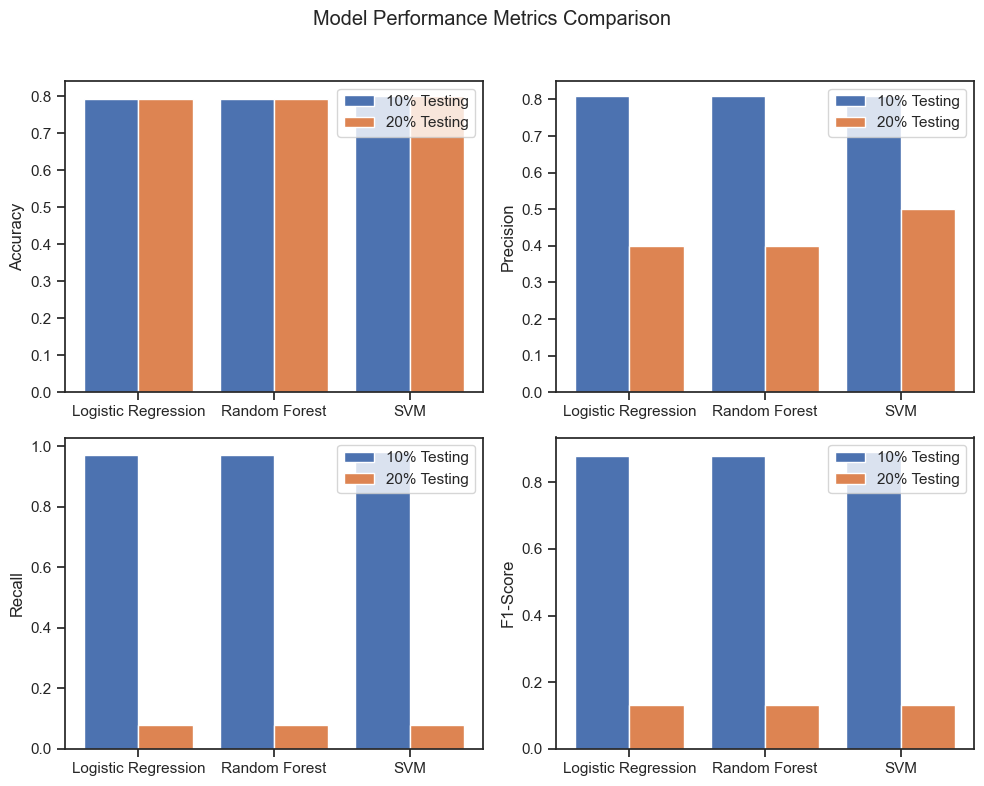

In [2944]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your actual data)
models = ['Logistic Regression', 'Random Forest', 'SVM']
testing_percentages = ['10%', '20%']

accuracy_data = np.array([[0.7939, 0.7939, 0.8015],
                          [0.7939, 0.7939, 0.8015]])

precision_data = np.array([[0.81, 0.81, 0.81],
                           [0.40, 0.40, 0.50]])

recall_data = np.array([[0.97, 0.97, 0.98],
                        [0.08, 0.08, 0.08]])

f1_score_data = np.array([[0.88, 0.88, 0.89],
                          [0.13, 0.13, 0.13]])

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Model Performance Metrics Comparison')

metrics = [('Accuracy', accuracy_data), ('Precision', precision_data),
           ('Recall', recall_data), ('F1-Score', f1_score_data)]

for i, (metric, data) in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    ax.bar(np.arange(len(models)) - 0.2, data[0, :], width=0.4, label='10% Testing')
    ax.bar(np.arange(len(models)) + 0.2, data[1, :], width=0.4, label='20% Testing')
    ax.set_xticks(np.arange(len(models)))
    ax.set_xticklabels(models)
    ax.set_ylabel(metric)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


References

Vijetha (2022) Plot Distribution of Column Values in Pandas, Spark By {Examples}. Available at: https://sparkbyexamples.com/pandas/plot-distribution-of-column-values-in-pandas/#google_vignett
‌

Frost, J. (2018) Assessing Normality: Histograms vs. Normal Probability Plots, Statistics By Jim. Available at: https://statisticsbyjim.com/basics/assessing-normality-histograms-probability-plots/
‌

What Is Employee Attrition? Definition, Attrition Rate, Factors, and Reduction Best Practices (no date) Spiceworks. Available at: https://www.spiceworks.com/hr/engagement-retention/articles/what-is-attrition-complete-guide/#_001
‌

Kumar, A. (2022) PCA vs LDA Differences, Plots, Examples, Data Analytics. Available at: https://vitalflux.com/pca-vs-lda-differences-plots-examples/


‌
‌

GitHub repo link

https://github.com/riccardopossier/Continuous-Assessment.git